# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---

## Loading Data as numpy_ndarray

In [2]:
data = np.fromfile('D:\\Data Science Course\\Datasets\\project.bin',dtype='B',count=-1)
data = data.reshape(-1,84)

---

## Creating Pandas DataFrame Using Loaded Data

In [3]:
train_df = pd.DataFrame(data)

In [4]:
train_df.shape

(50000, 84)

In [5]:
data

array([[127, 105, 103, ...,   0, 109, 101],
       [127, 105, 103, ...,   0, 109, 103],
       [127, 105, 103, ...,   0, 109, 103],
       ...,
       [127, 105, 103, ...,   0, 109, 103],
       [127, 105, 103, ...,   0, 109, 103],
       [127, 105, 103, ...,   0, 109, 103]], dtype=uint8)

In [6]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000
mean,125.97430,104.879240,102.642680,99.609440,110.899680,112.068400,101.144400,102.644440,101.09652,0.0,...,107.185080,108.904040,107.131960,104.086200,102.844560,114.569560,0.049120,0.0,109.126320,102.639040
std,1.62764,0.711328,0.905858,1.076571,0.731154,1.106773,0.793751,0.890434,0.72026,0.0,...,0.828733,0.754932,0.724732,1.072918,0.715212,0.917092,2.065583,0.0,0.788857,0.895926
min,120.00000,93.000000,91.000000,87.000000,99.000000,101.000000,89.000000,89.000000,89.00000,0.0,...,97.000000,97.000000,97.000000,93.000000,91.000000,107.000000,0.000000,0.0,101.000000,91.000000
25%,125.00000,105.000000,103.000000,99.000000,111.000000,111.000000,101.000000,103.000000,101.00000,0.0,...,107.000000,109.000000,107.000000,103.000000,103.000000,115.000000,0.000000,0.0,109.000000,103.000000
50%,127.00000,105.000000,103.000000,99.000000,111.000000,113.000000,101.000000,103.000000,101.00000,0.0,...,107.000000,109.000000,107.000000,105.000000,103.000000,115.000000,0.000000,0.0,109.000000,103.000000
75%,127.00000,105.000000,103.000000,101.000000,111.000000,113.000000,101.000000,103.000000,101.00000,0.0,...,107.000000,109.000000,107.000000,105.000000,103.000000,115.000000,0.000000,0.0,109.000000,103.000000
max,127.00000,117.000000,115.000000,113.000000,123.000000,125.000000,113.000000,117.000000,113.00000,0.0,...,119.000000,121.000000,119.000000,113.000000,113.000000,125.000000,131.000000,0.0,119.000000,115.000000


In [7]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,127,105,103,99,111,111,101,103,101,0,...,107,109,107,103,103,115,0,0,109,101
1,127,105,103,99,111,111,101,103,101,0,...,107,109,107,103,103,115,0,0,109,103
2,127,105,103,99,111,111,101,101,101,0,...,107,109,107,103,101,113,0,0,109,103
3,127,105,103,99,111,111,101,101,101,0,...,107,109,107,103,103,113,0,0,109,103
4,127,105,103,99,111,111,101,101,99,0,...,107,109,107,103,103,113,0,0,109,103


---

# About Data : 

        1) This is the data generated by 84 different sensors which are inside the pipe.
        2) In this data, there is 5000 rows of data is for single pipe.  This means we have data for total 10 pipes.

# Visualizing Data

###  data for pipe 1, sensor 0

([<matplotlib.axis.XTick at 0x2703e6bbd88>,
 <a list of 50 Text xticklabel objects>)

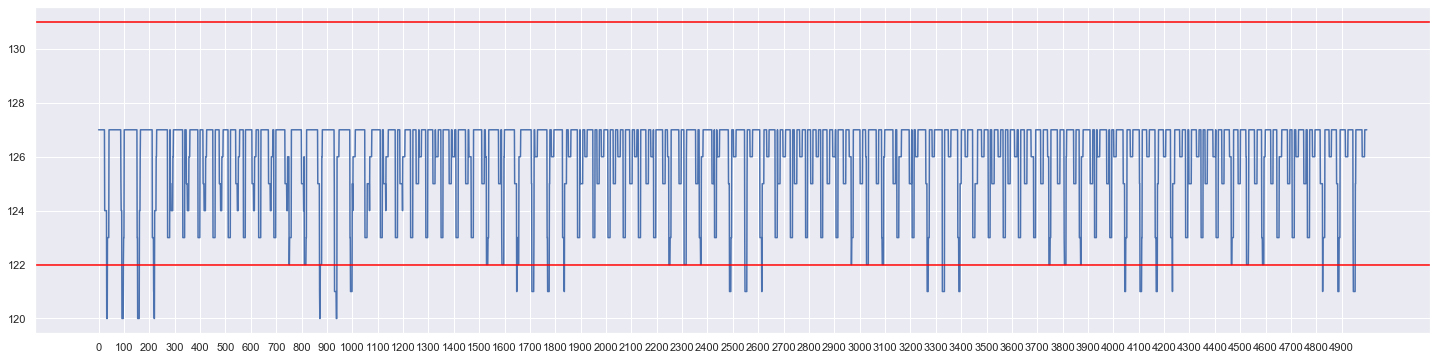

In [8]:
temp = data[:5000,0]
u_std = int(np.median(temp) + 3*temp.std())
l_std = int(np.median(temp) - 3*temp.std())
plt.figure(figsize = (25,6))
plt.plot(temp)
plt.axhline(u_std, c='red')
plt.axhline(l_std, c='red')
plt.xticks(np.arange(0,5000,100))

In [10]:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3-Q1

### Data for pipe_1 sensor:1

([<matplotlib.axis.XTick at 0x2703eab8e08>,
 <a list of 50 Text xticklabel objects>)

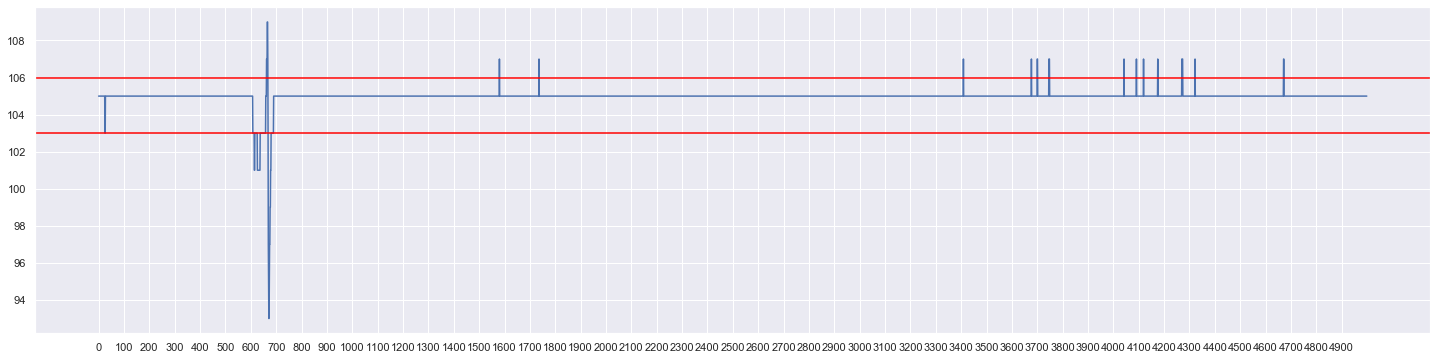

In [11]:
temp = data[:5000,1]
u_std = int(np.median(temp) + 3*temp.std())
l_std = int(np.median(temp) - 3*temp.std())
plt.figure(figsize = (25,6))
plt.plot(temp)
plt.axhline(u_std, c='red')
plt.axhline(l_std, c='red')
plt.xticks(np.arange(0,5000,100))

### Data for pipe_2 sensor:1

([<matplotlib.axis.XTick at 0x2703eba7c08>,
 <a list of 50 Text xticklabel objects>)

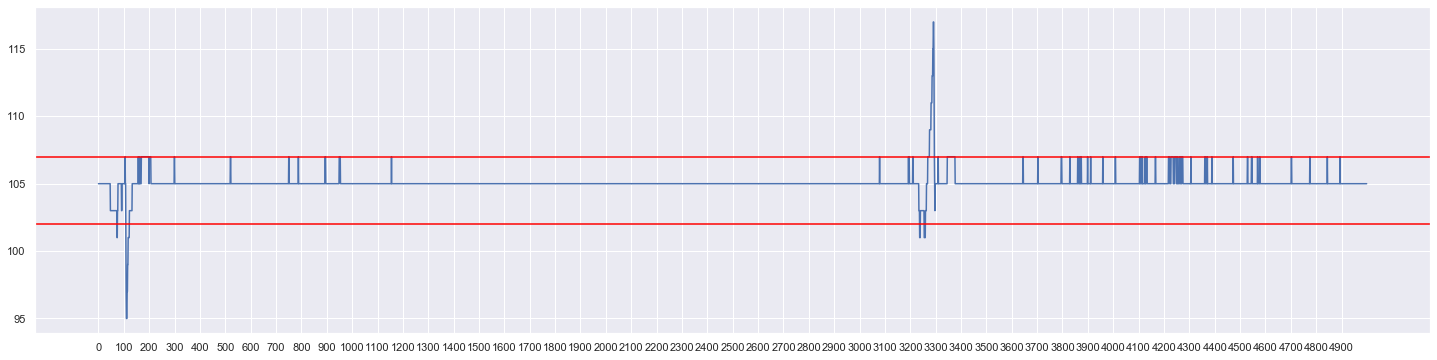

In [12]:
temp = data[5000:10000,1]
u_std = int(np.median(temp) + 3*temp.std())
l_std = int(np.median(temp) - 3*temp.std())
plt.figure(figsize = (25,6))
plt.plot(temp)
plt.axhline(u_std, c='red')
plt.axhline(l_std, c='red')
plt.xticks(np.arange(0,5000,100))

### Data for pipe_2 sensor:5

([<matplotlib.axis.XTick at 0x29e5f6f3948>,
 <a list of 50 Text xticklabel objects>)

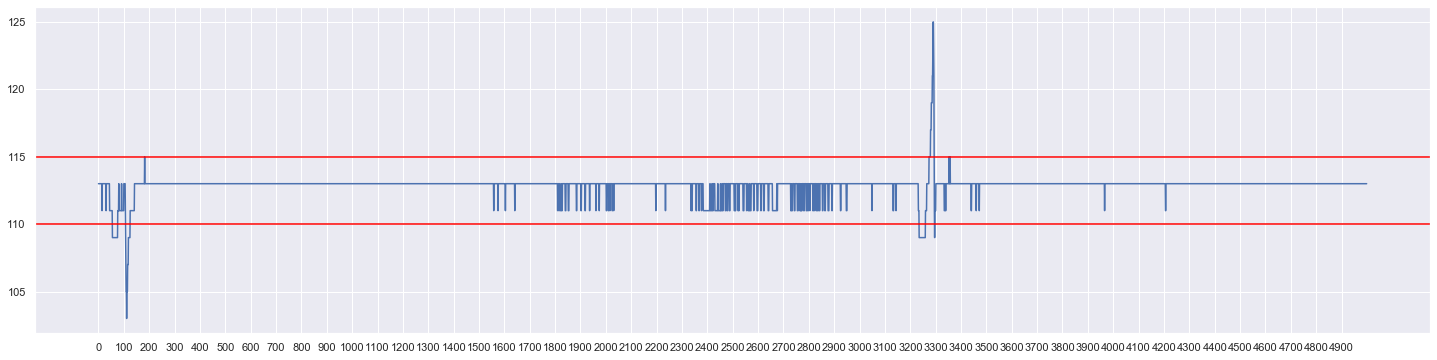

In [56]:
temp = data[5000:10000,5]
u_std = int(np.median(temp) + 3*temp.std())
l_std = int(np.median(temp) - 3*temp.std())
plt.figure(figsize = (25,6))
plt.plot(temp)
plt.axhline(u_std, c='red')
plt.axhline(l_std, c='red')
plt.xticks(np.arange(0,5000,100))

### Visualizing for all sensors in pipe 1.

C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sunil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

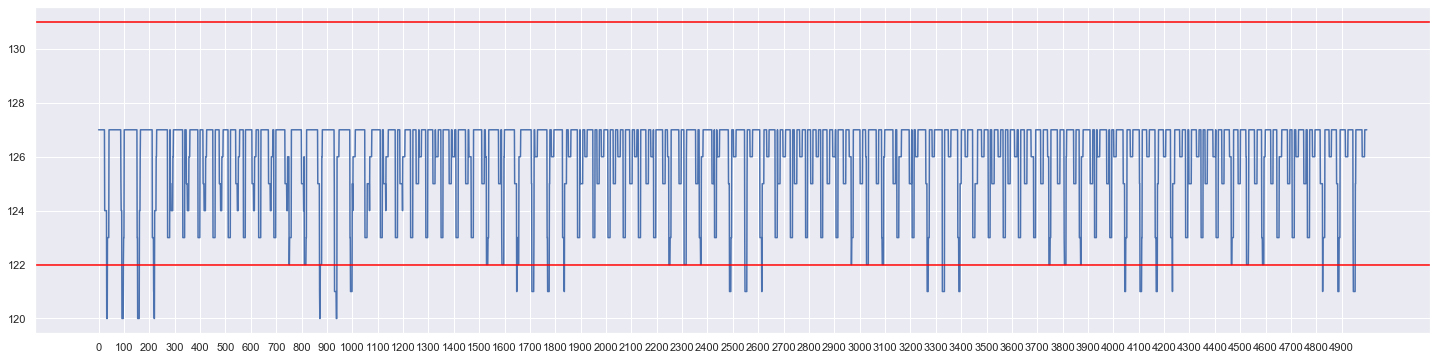

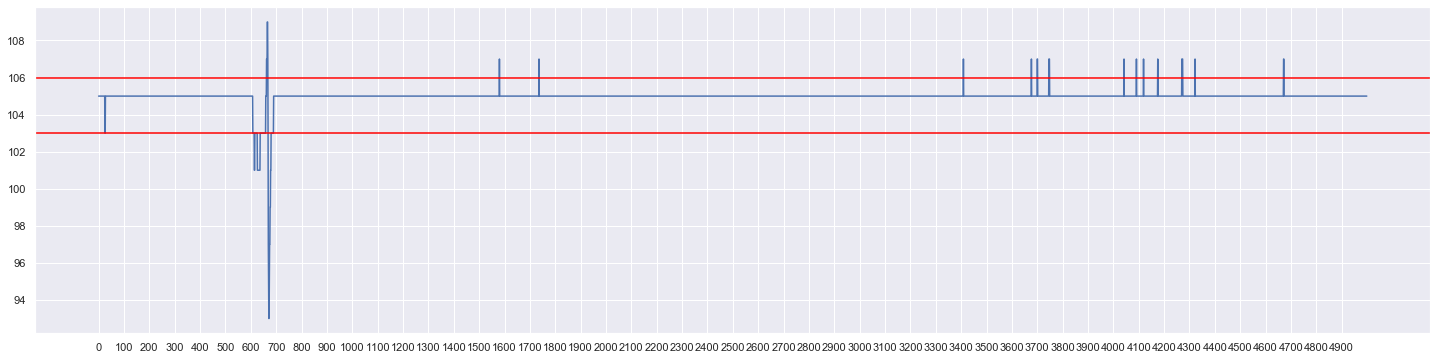

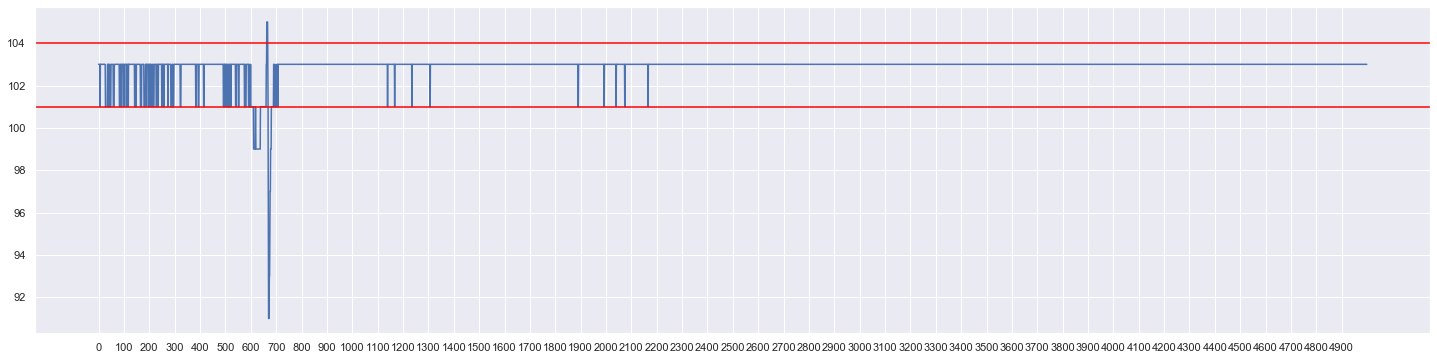

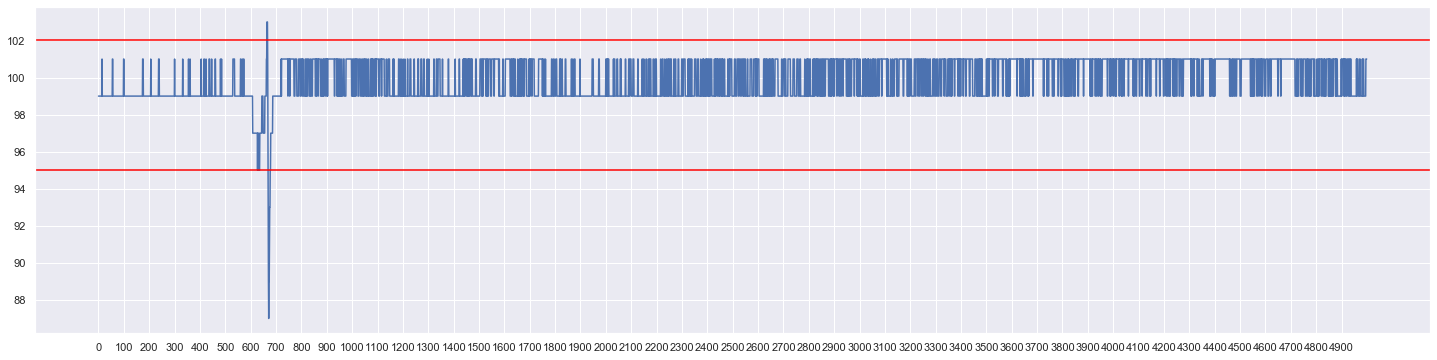

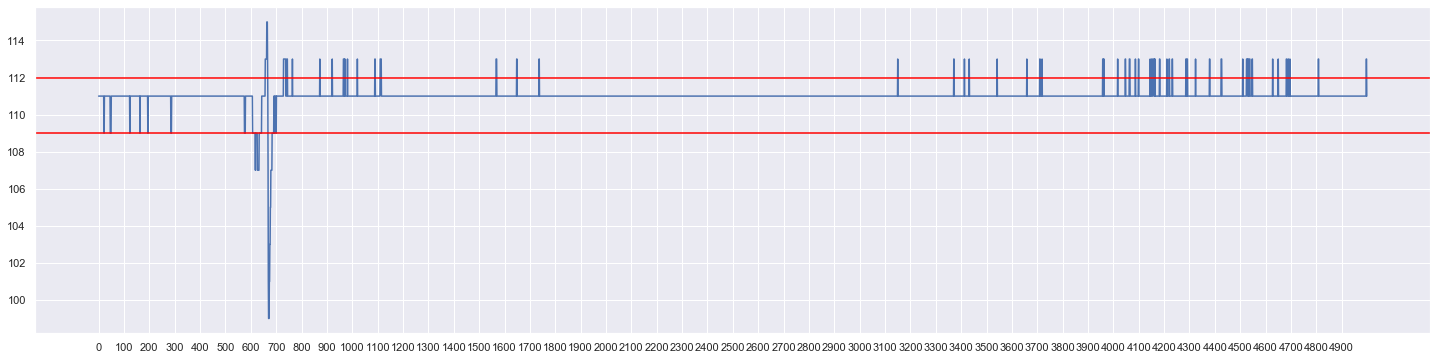

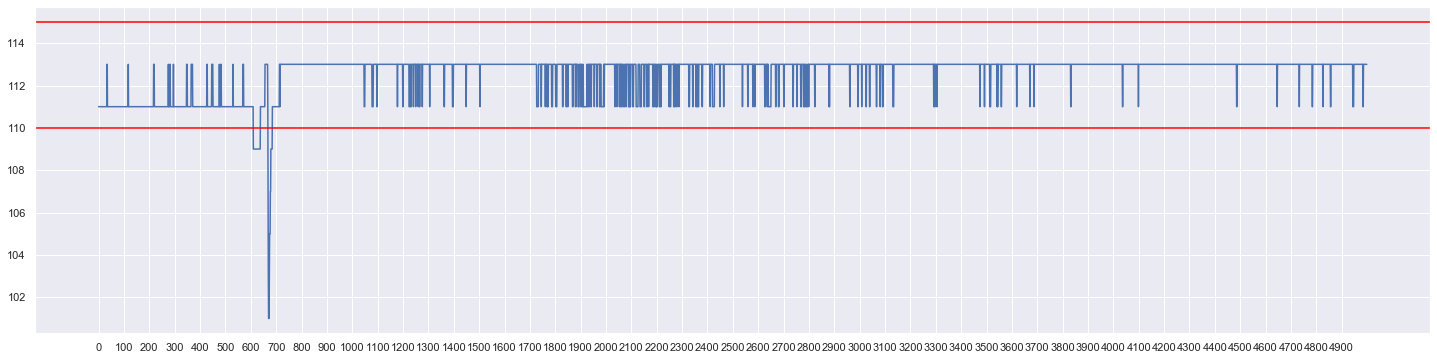

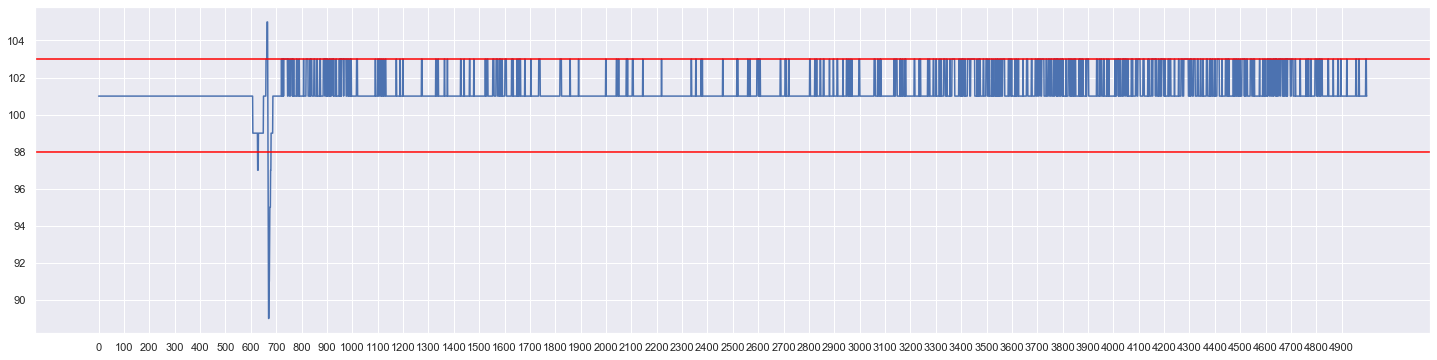

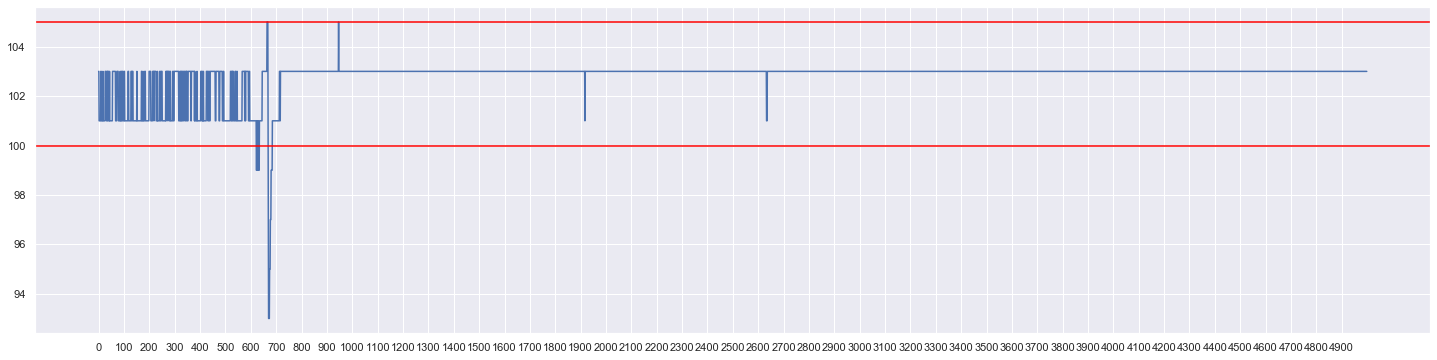

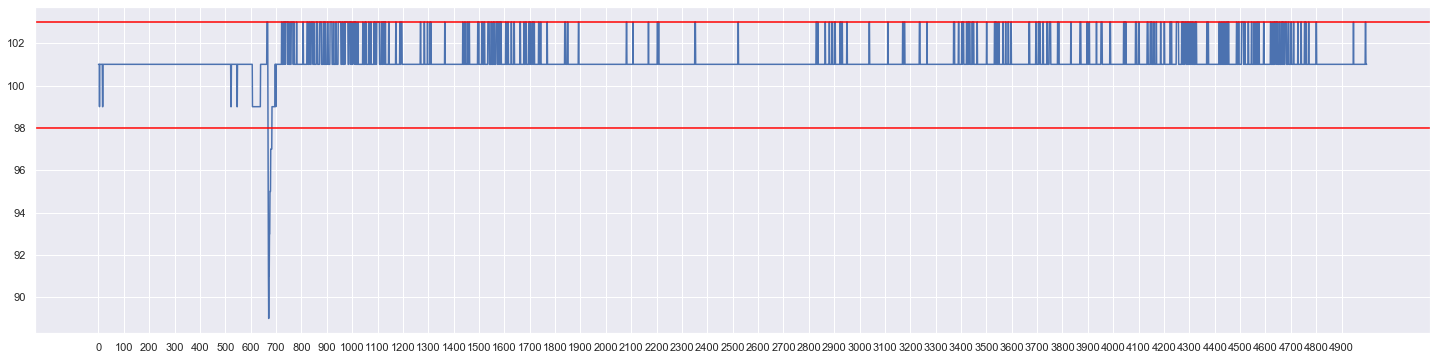

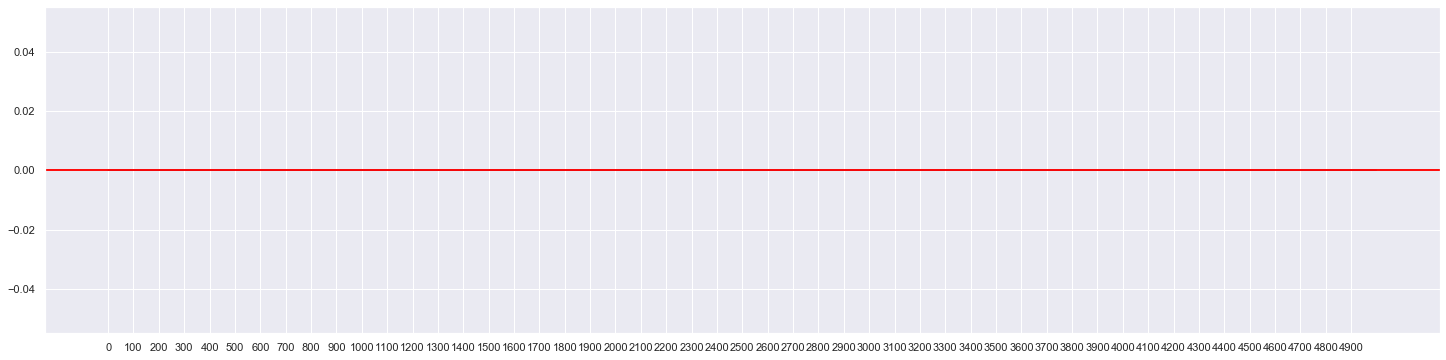

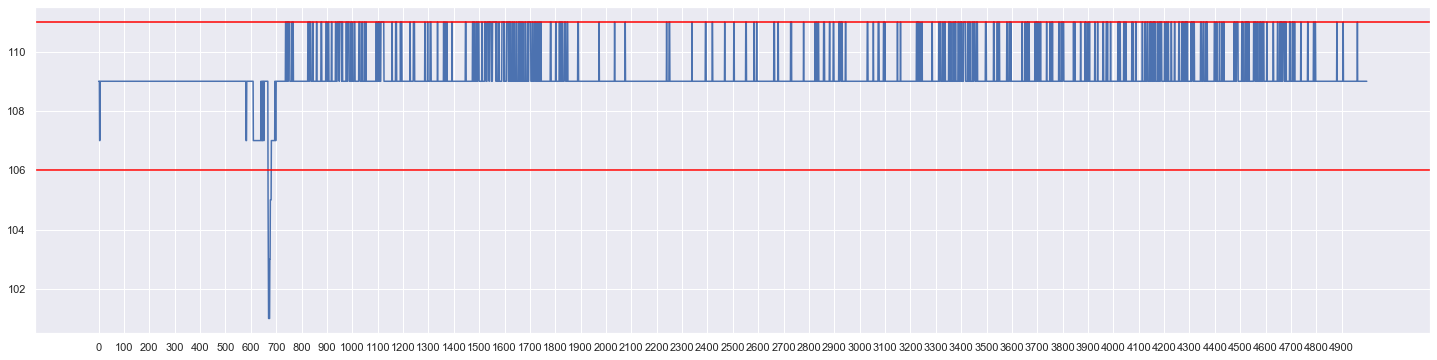

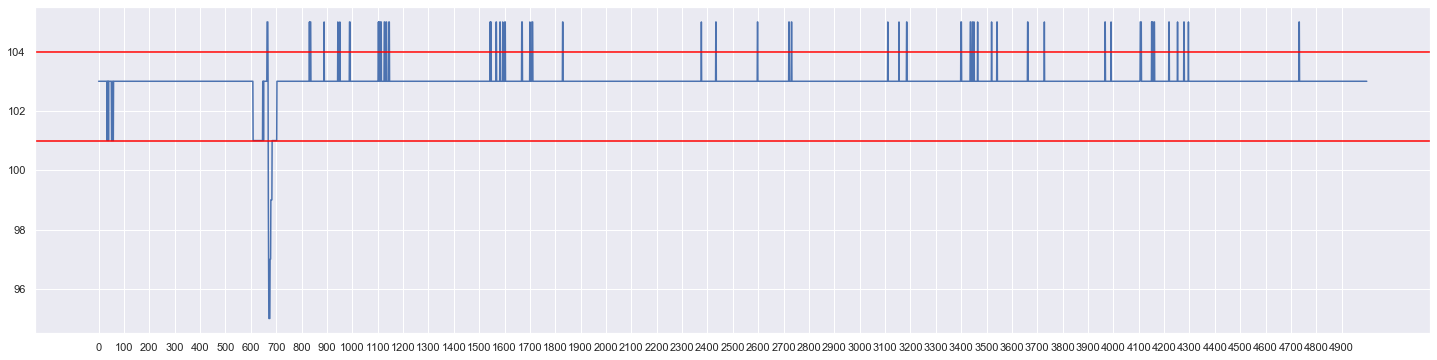

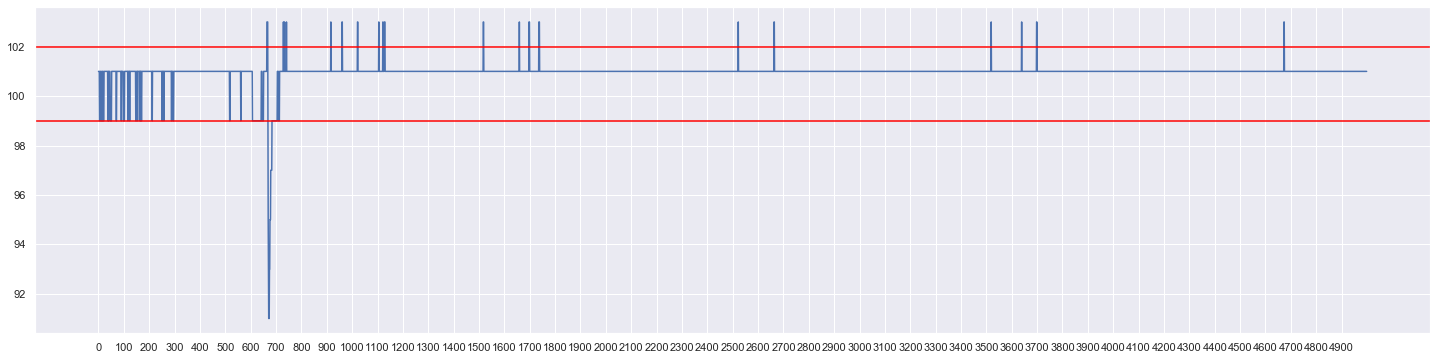

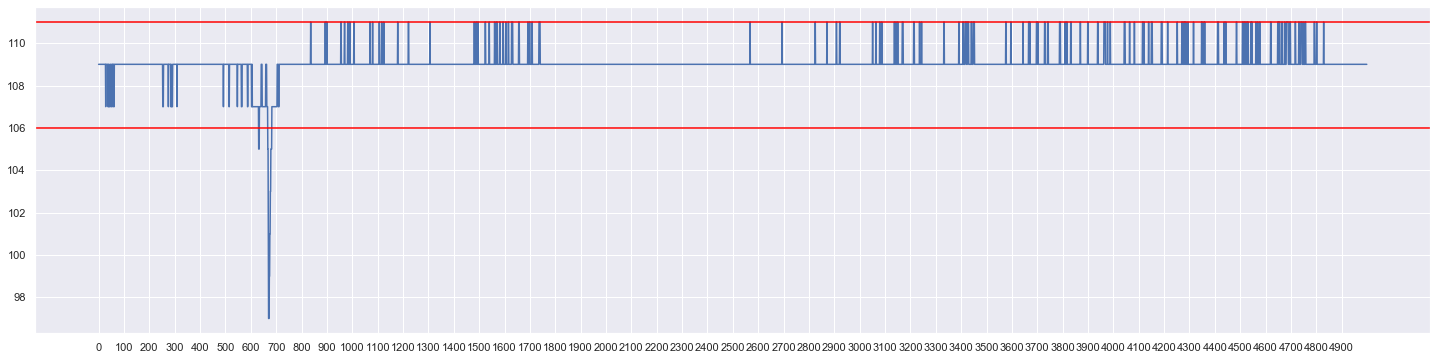

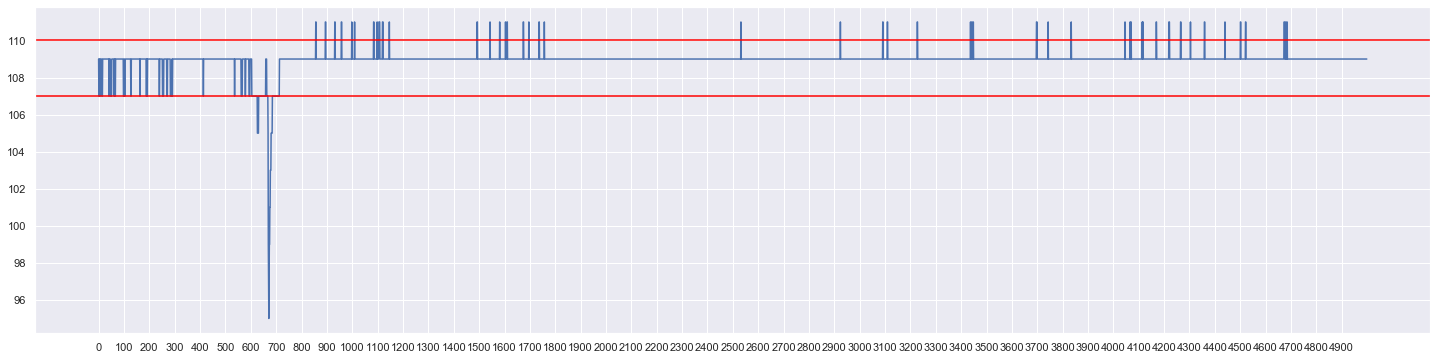

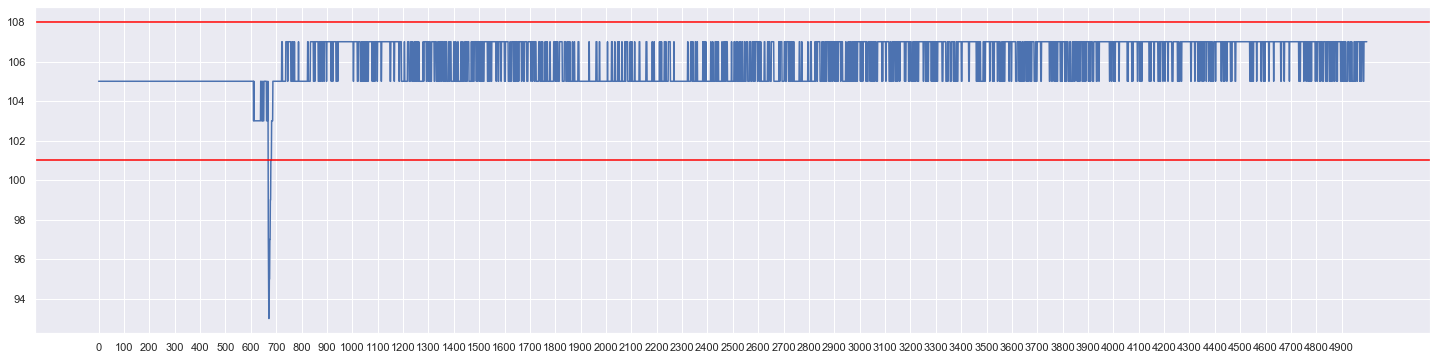

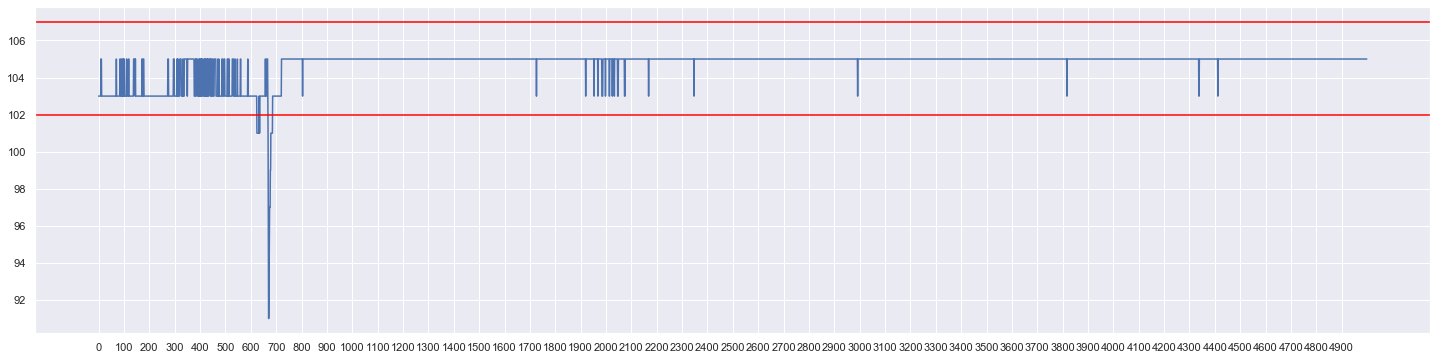

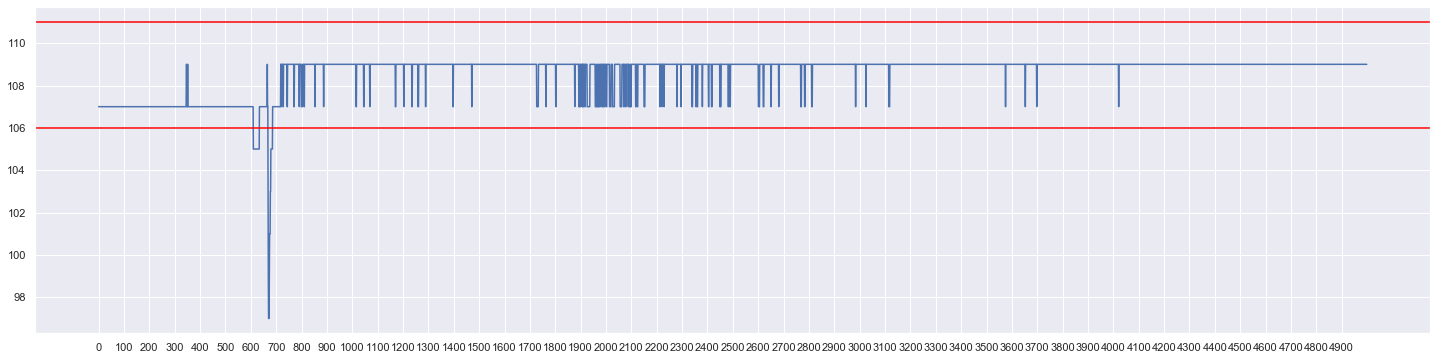

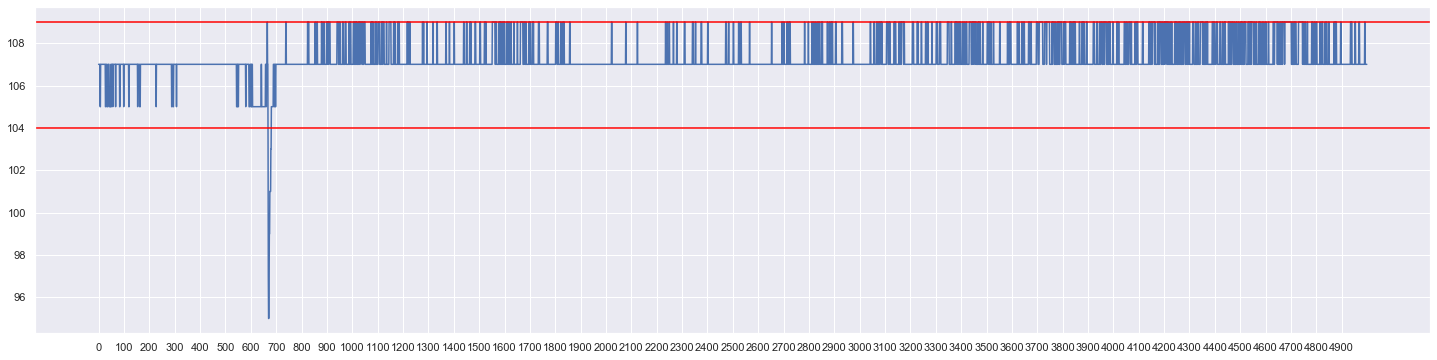

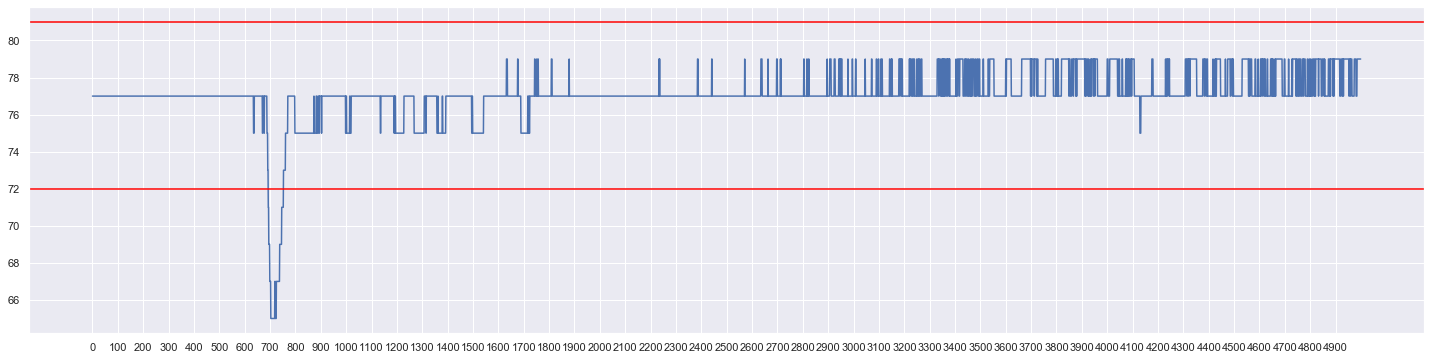

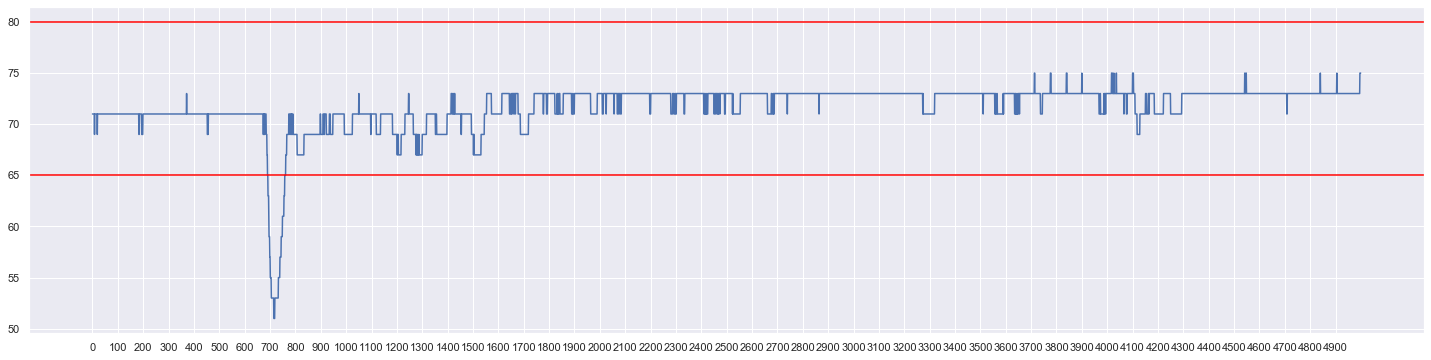

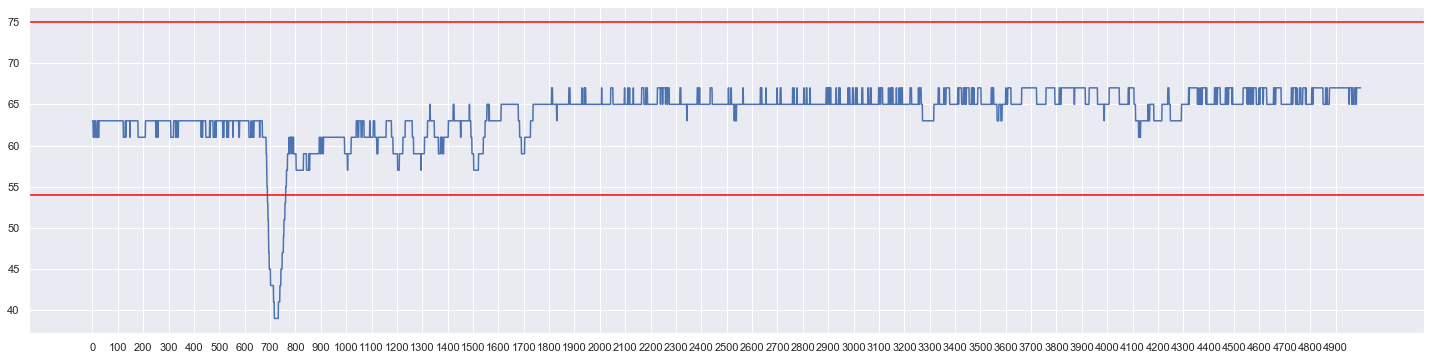

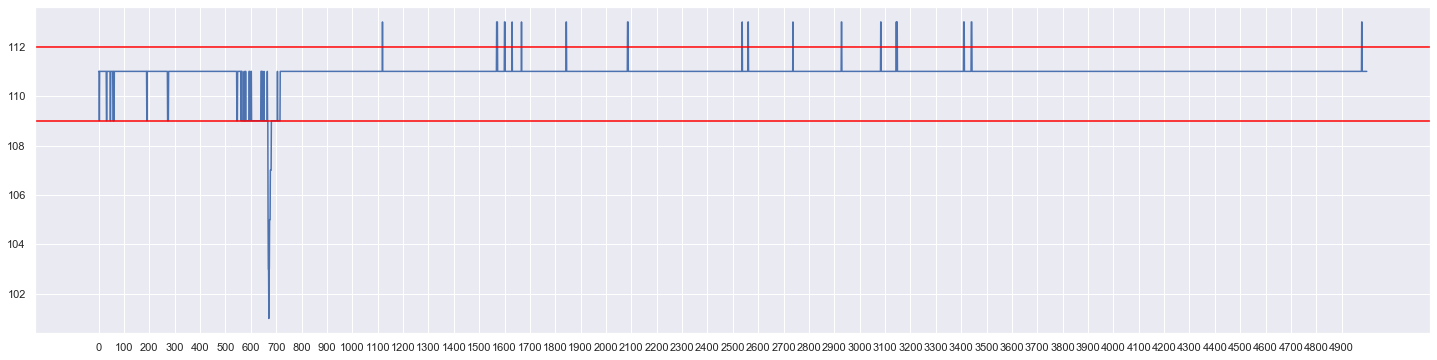

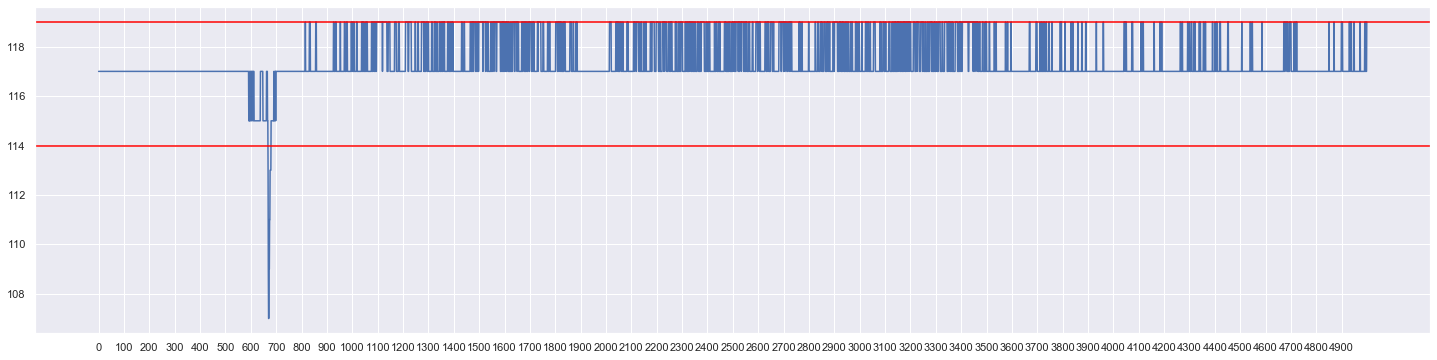

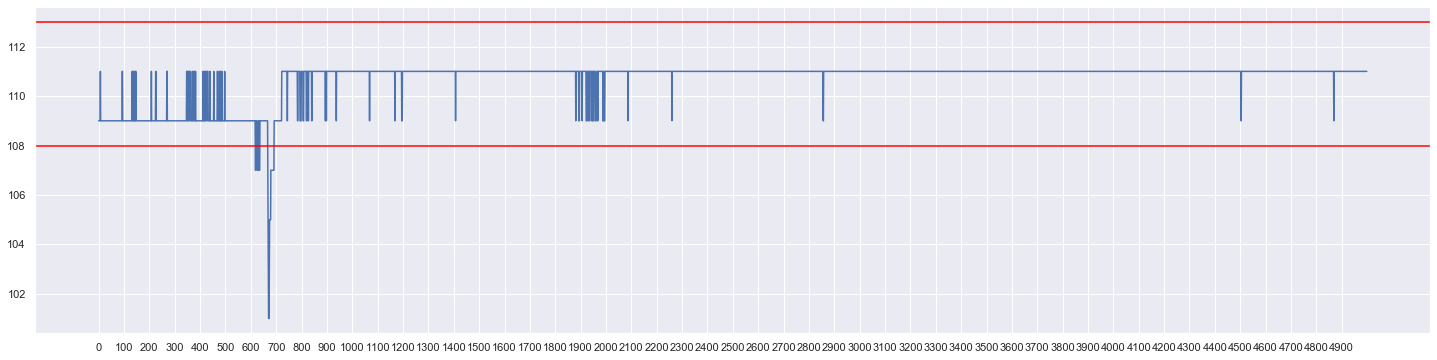

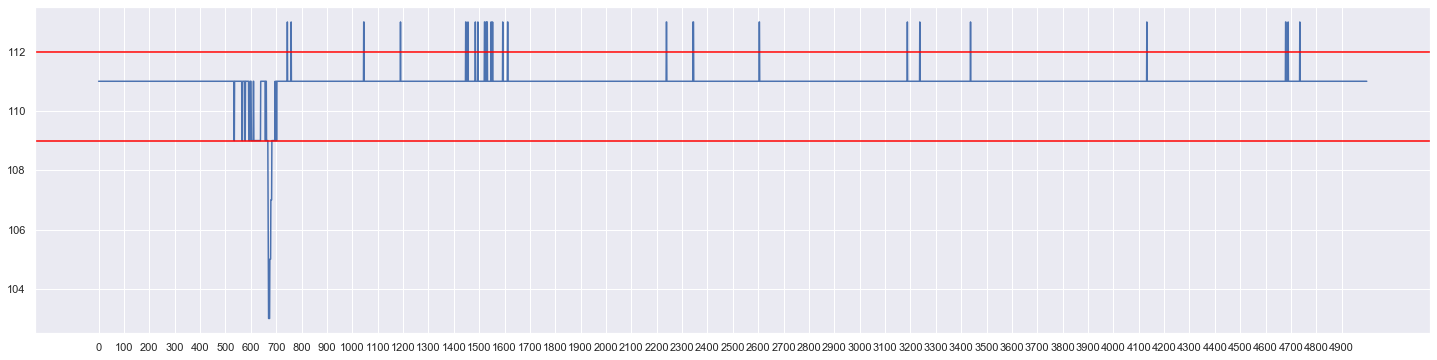

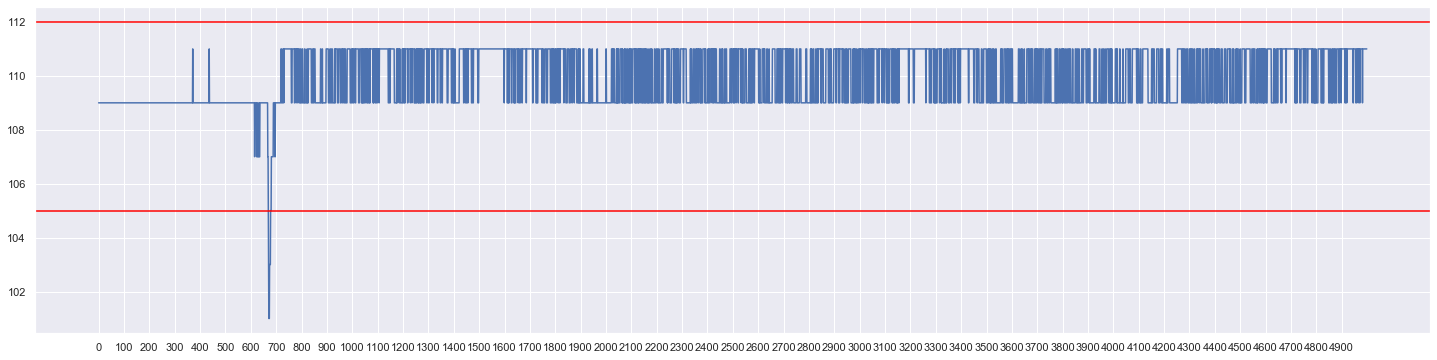

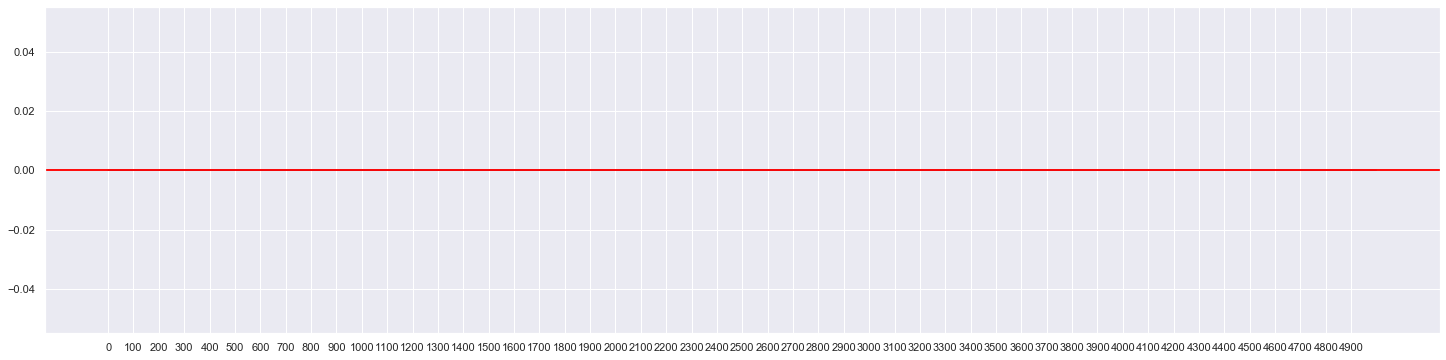

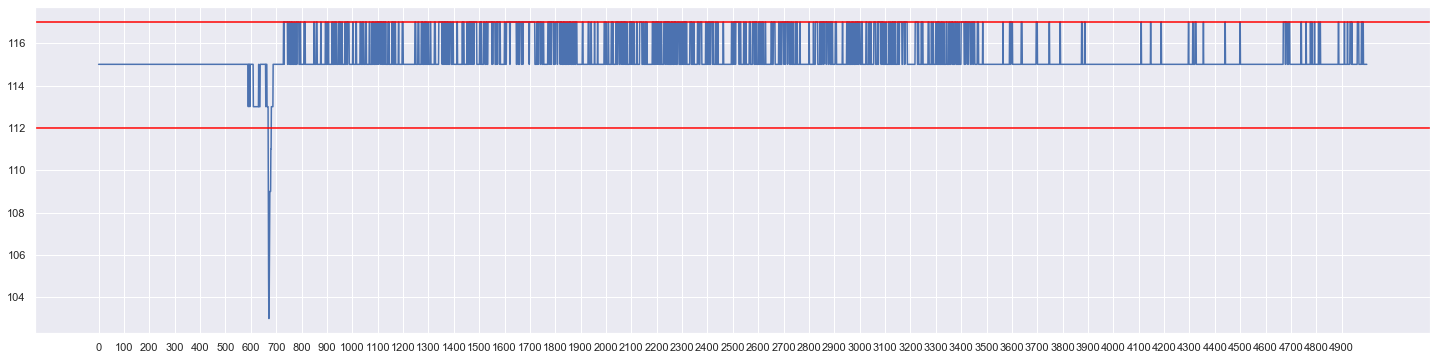

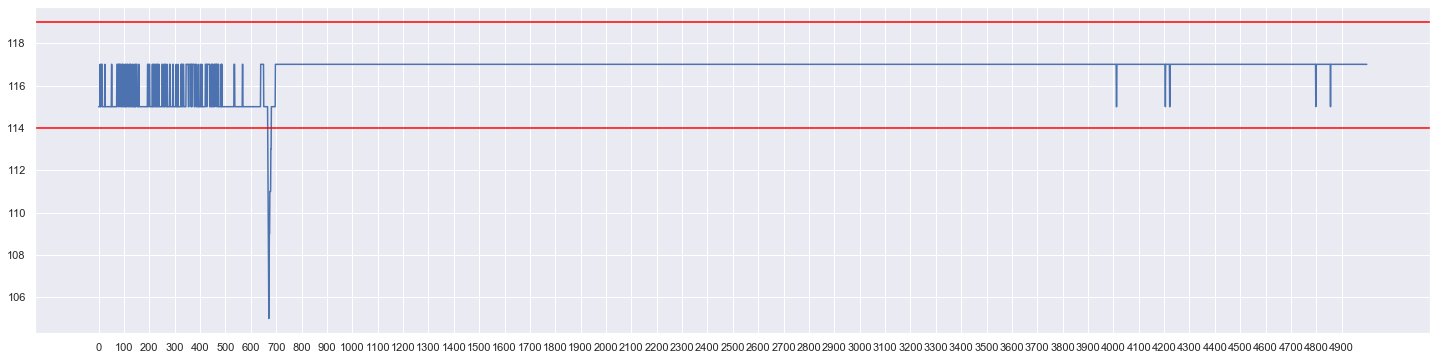

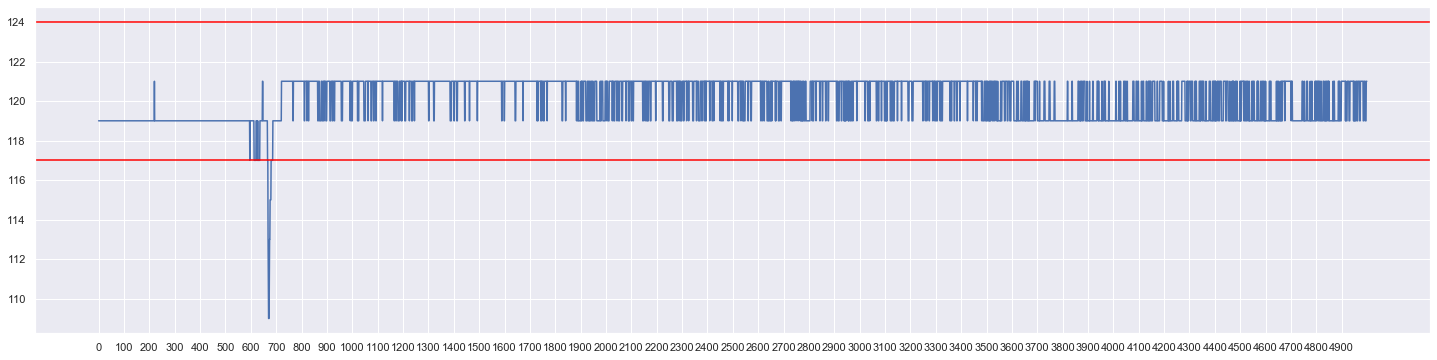

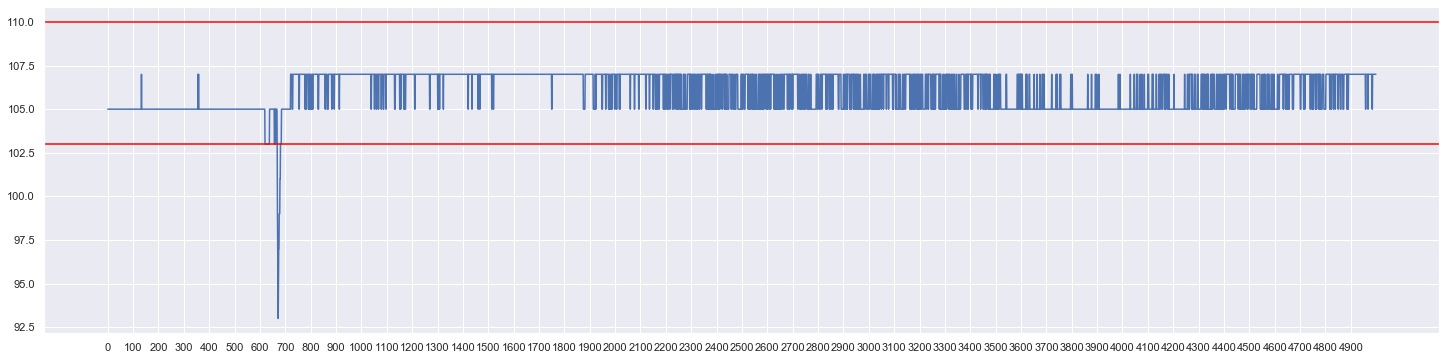

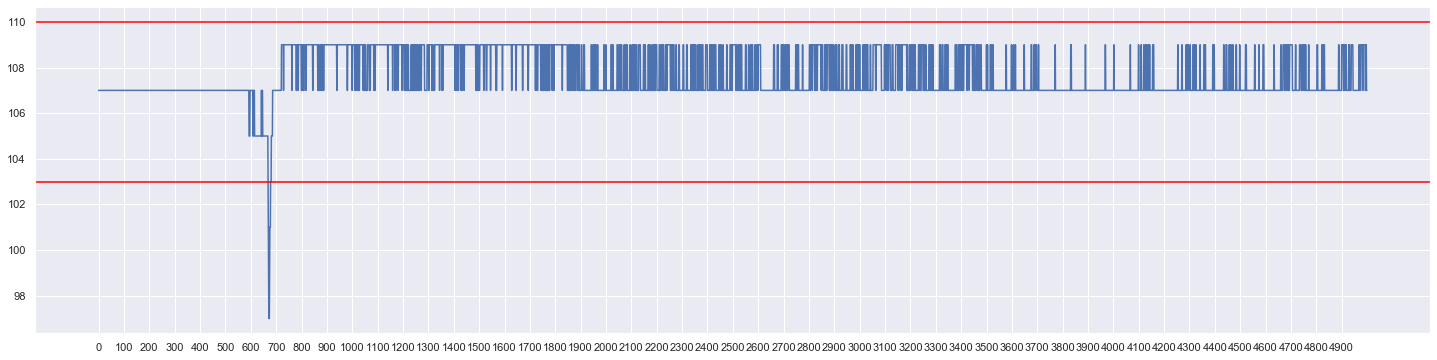

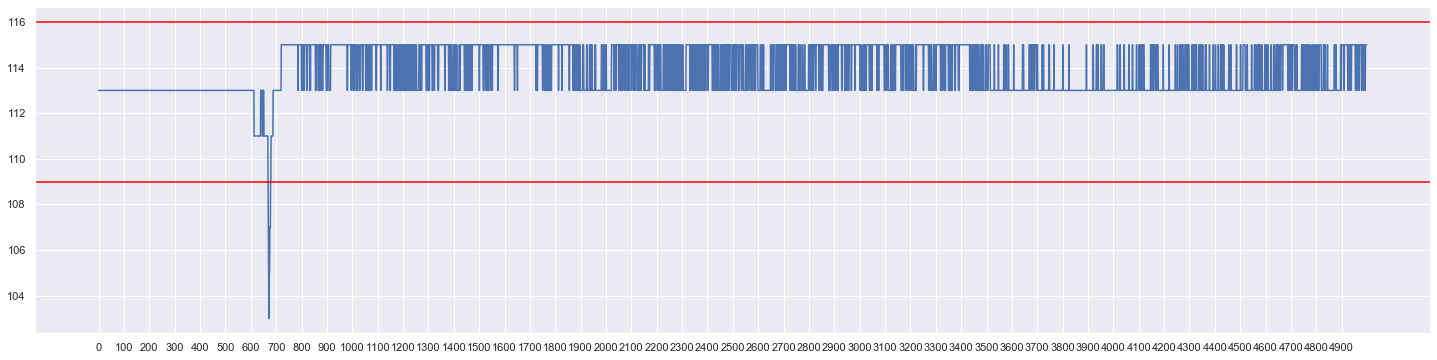

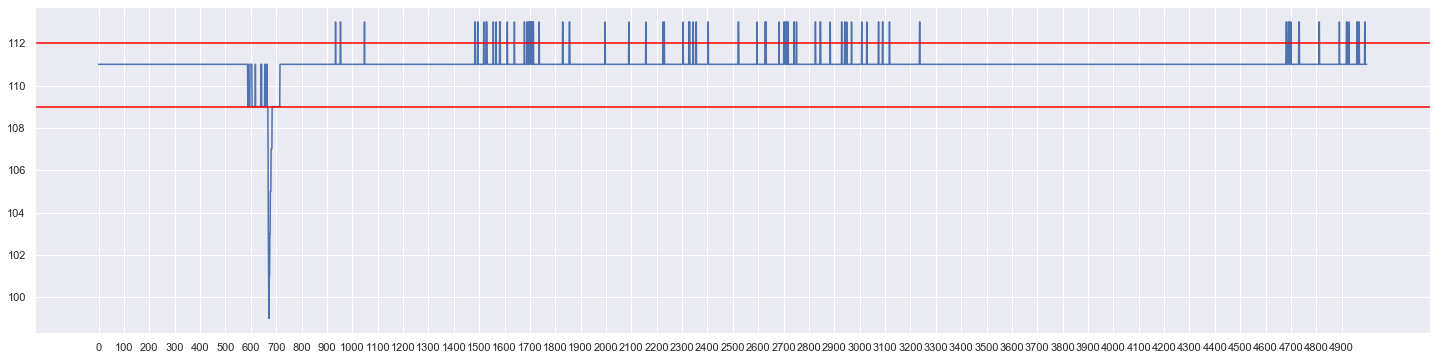

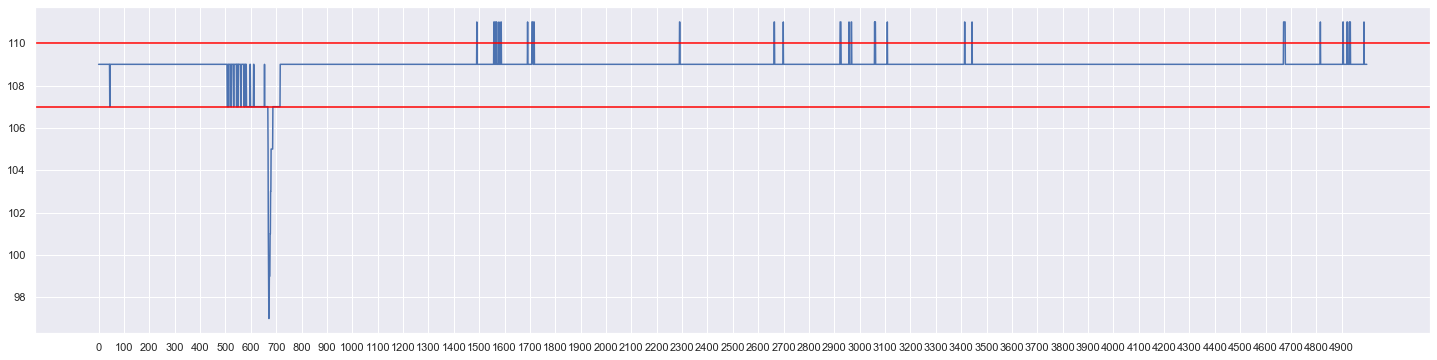

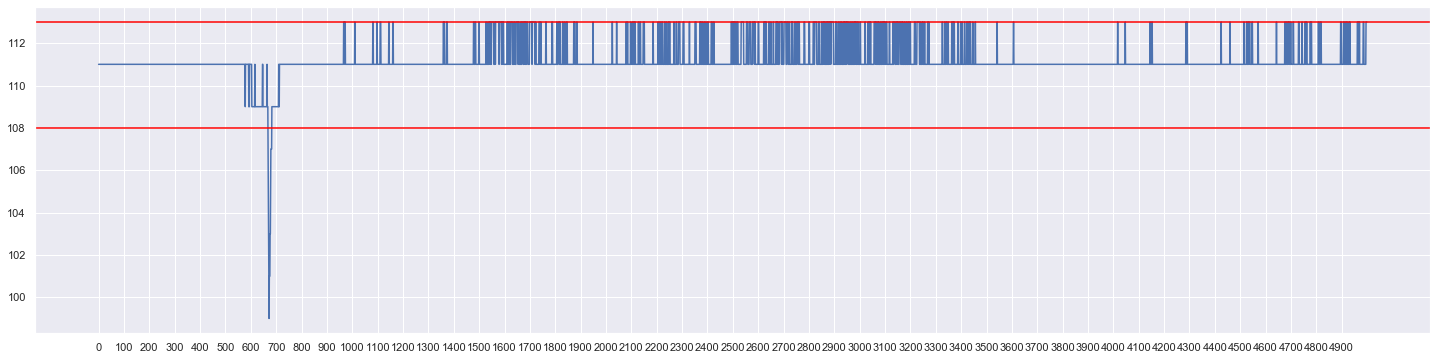

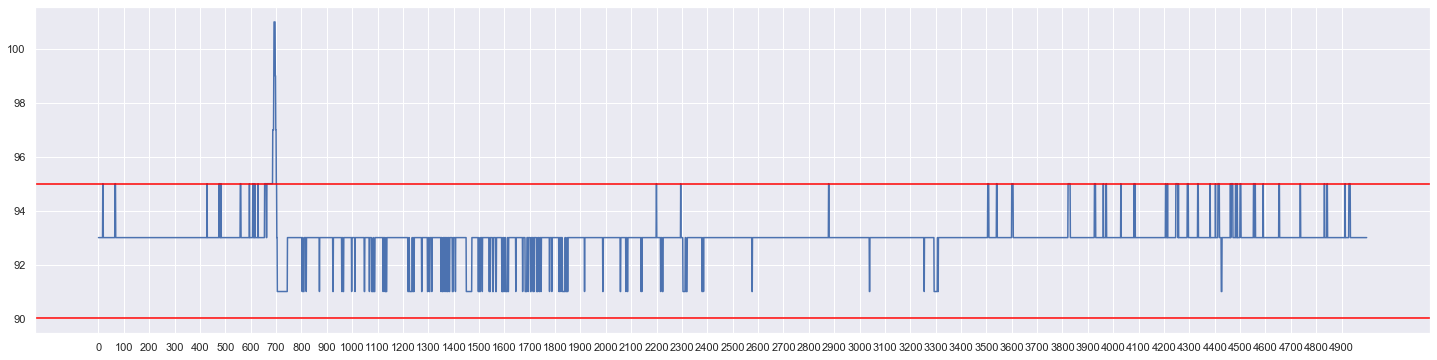

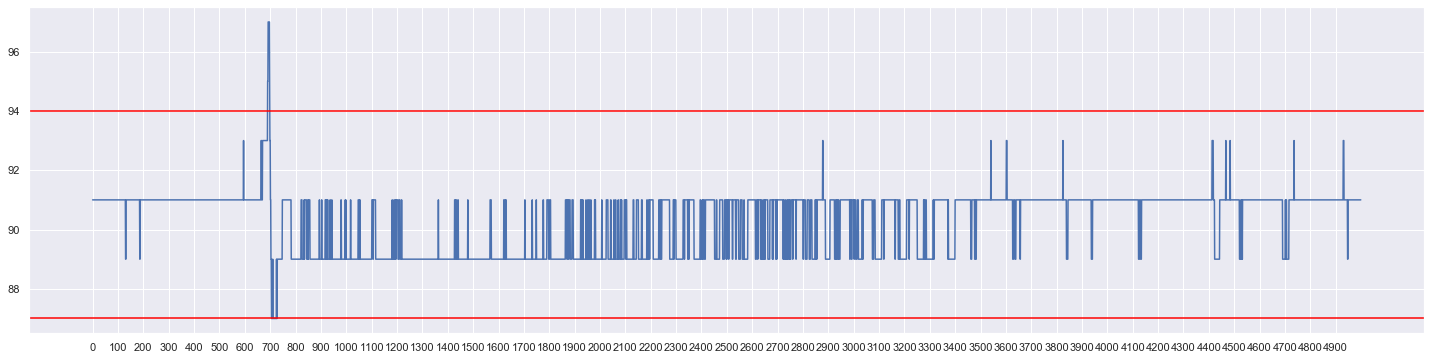

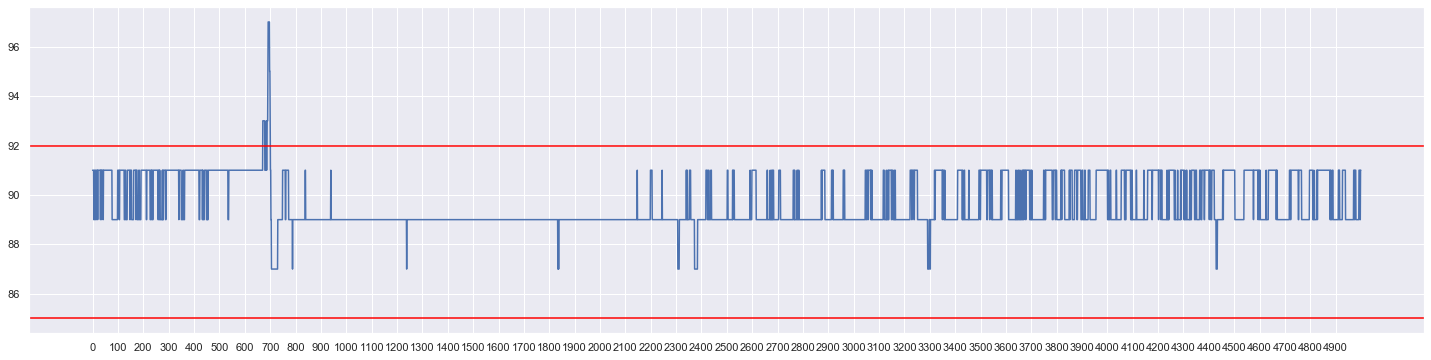

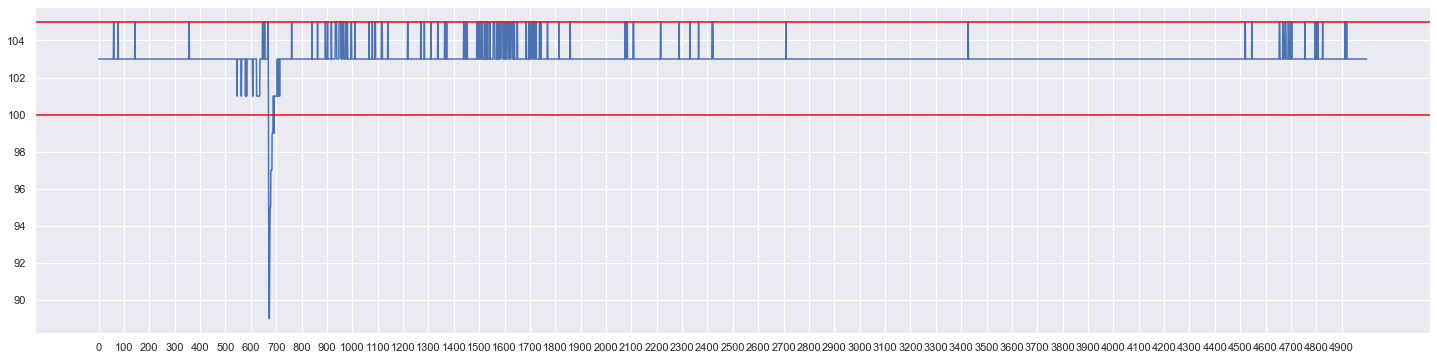

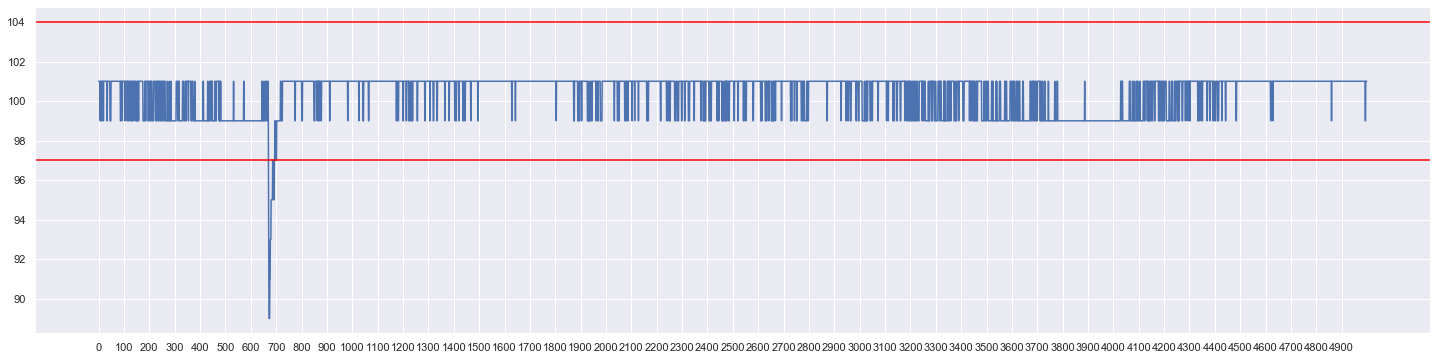

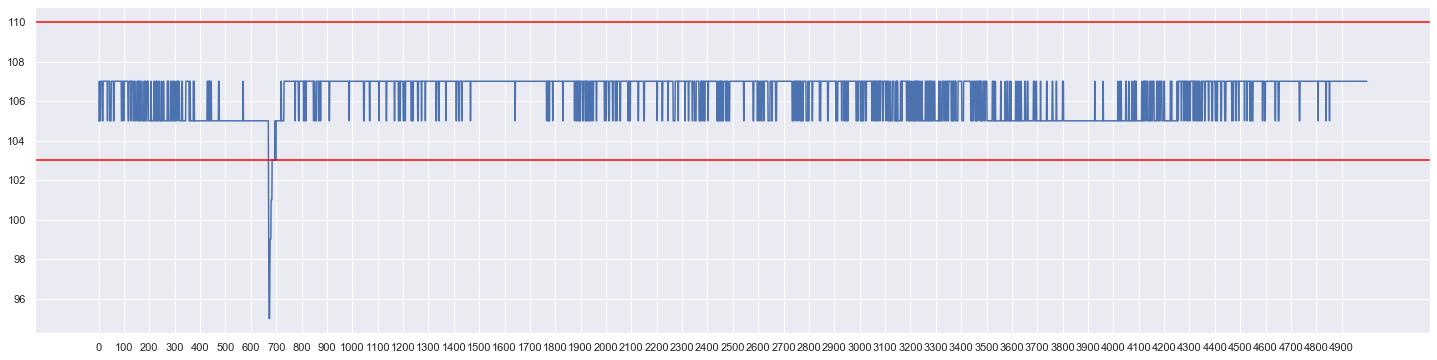

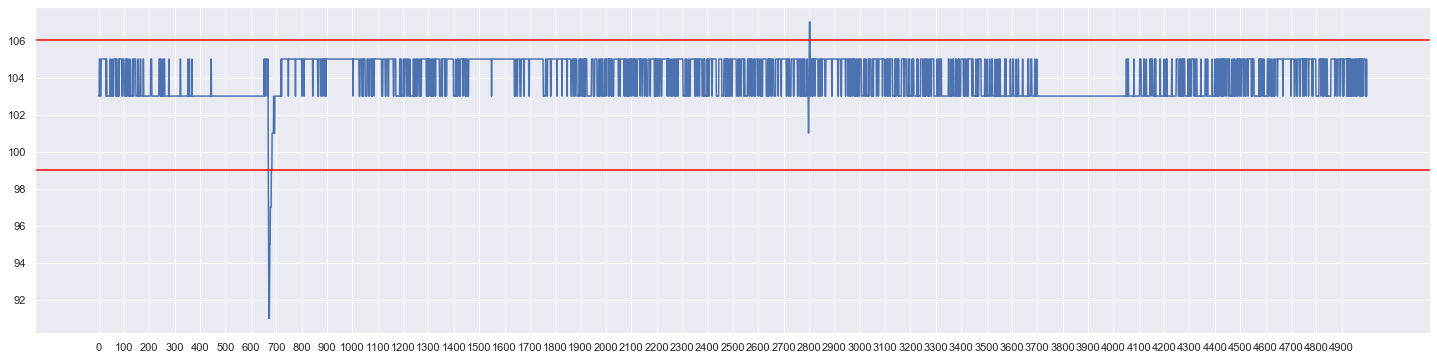

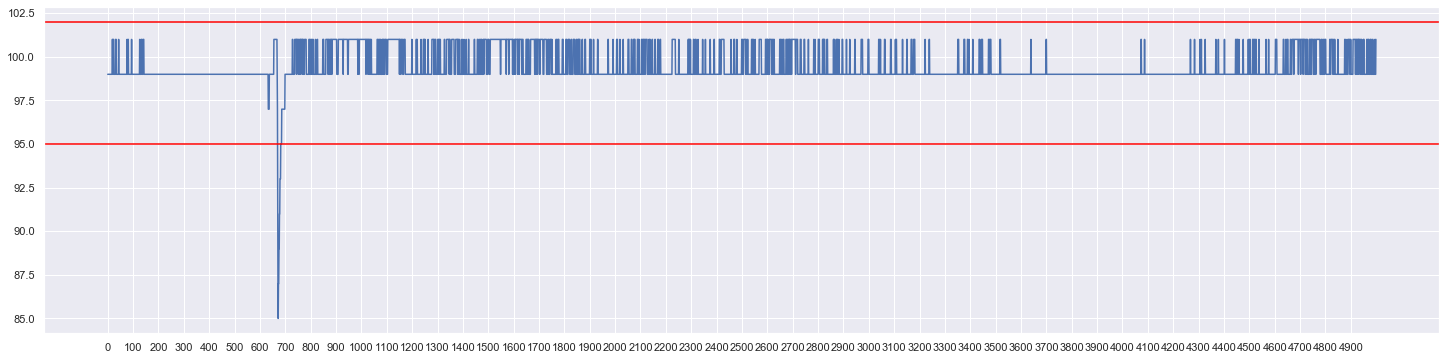

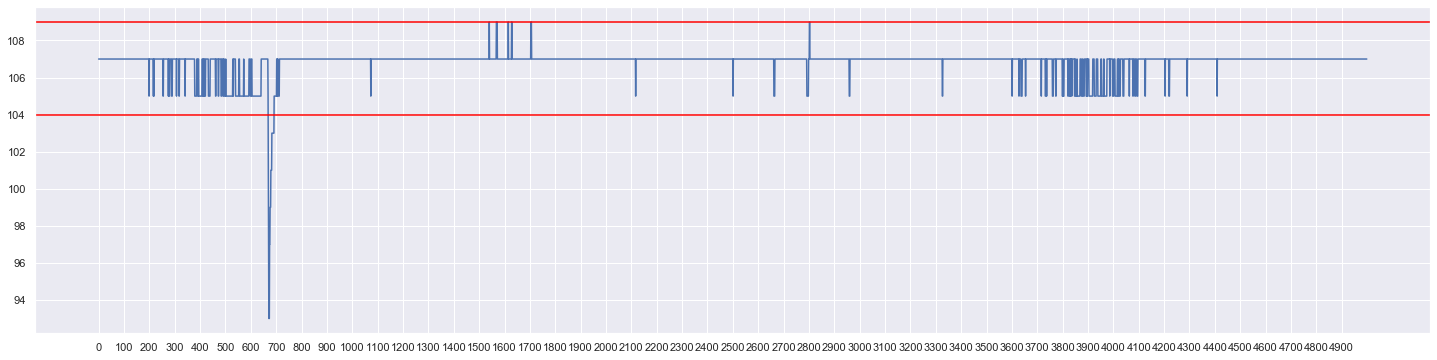

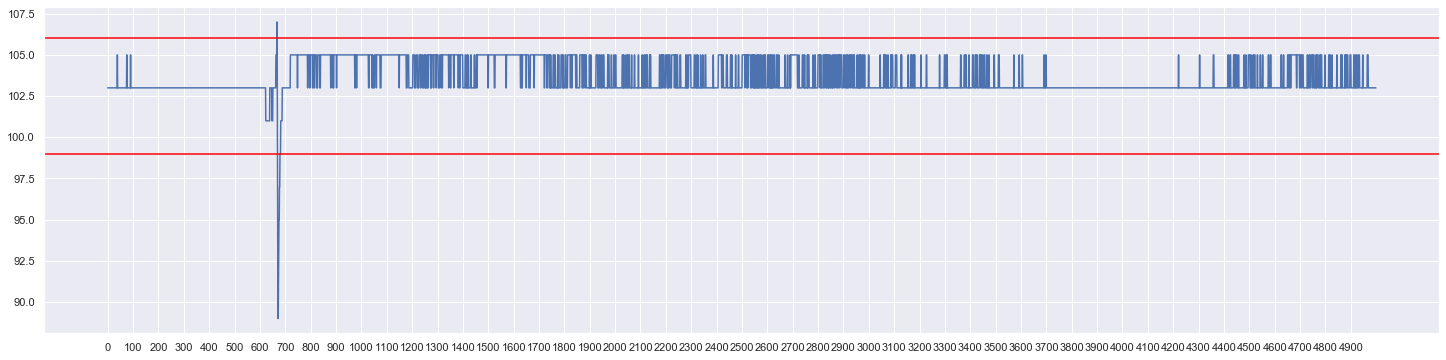

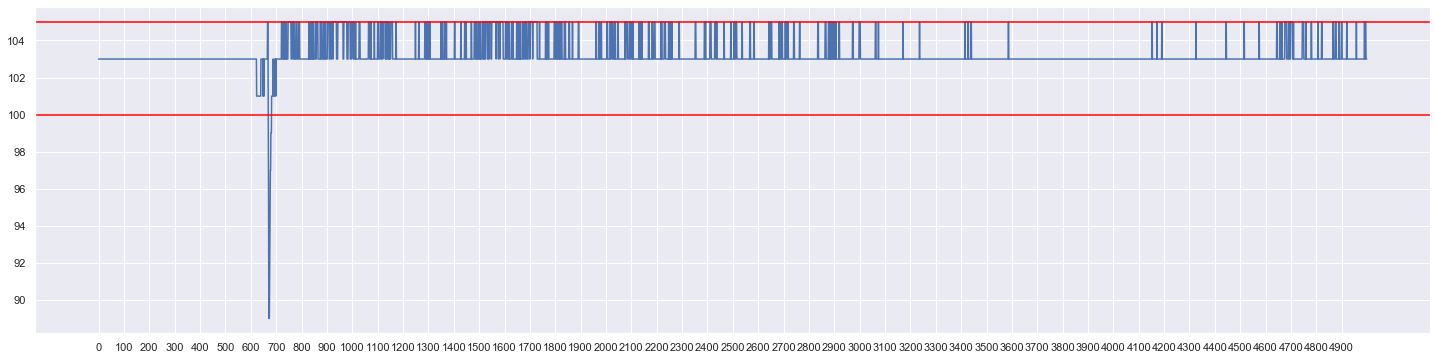

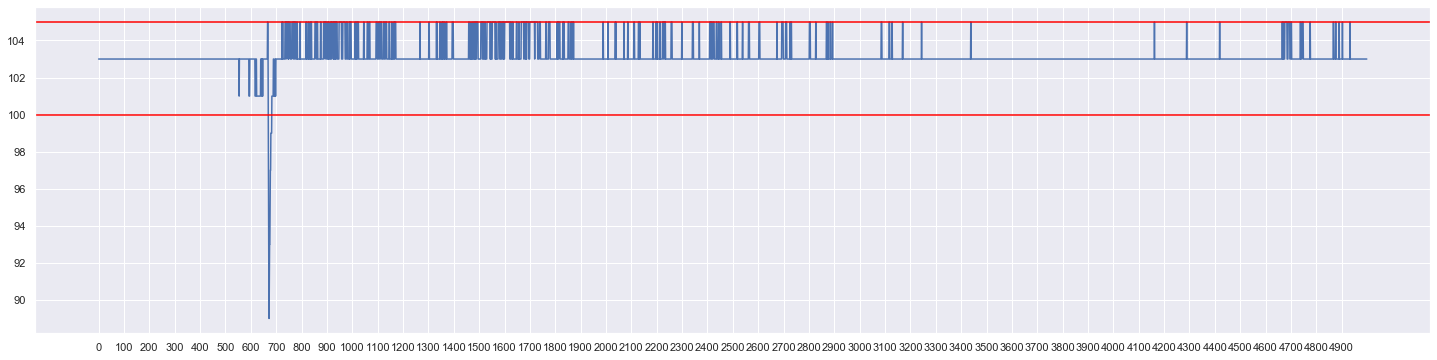

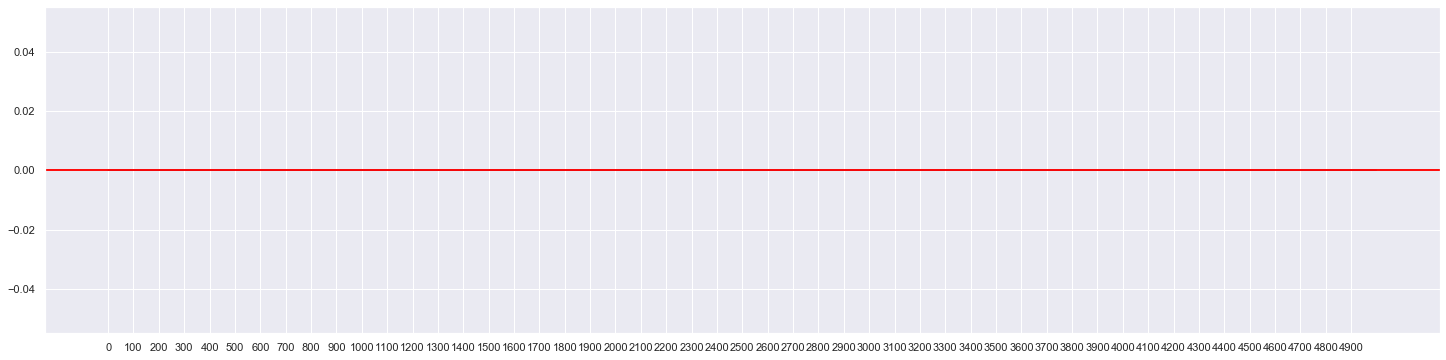

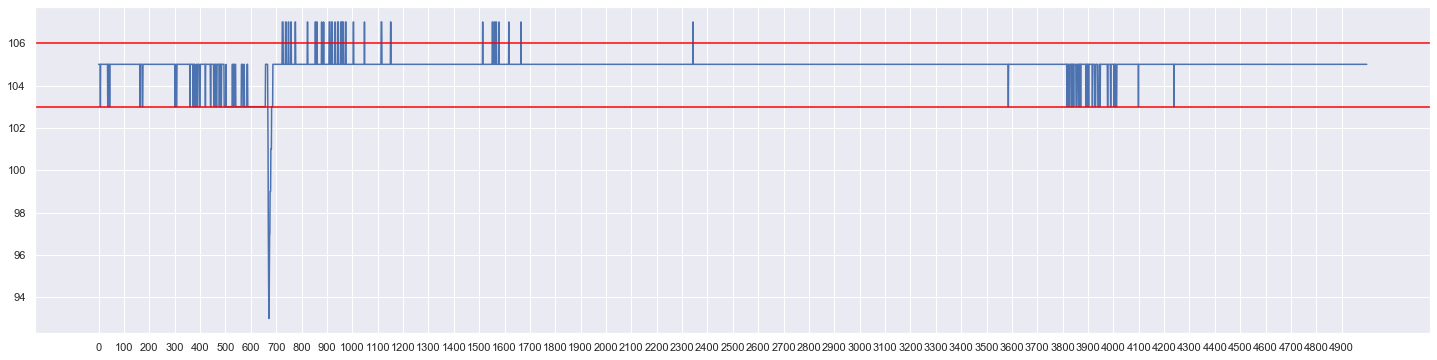

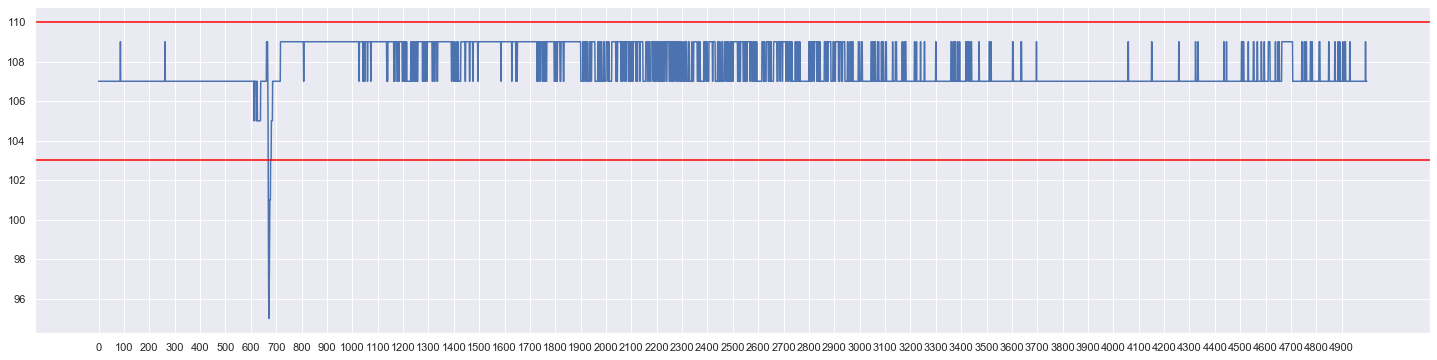

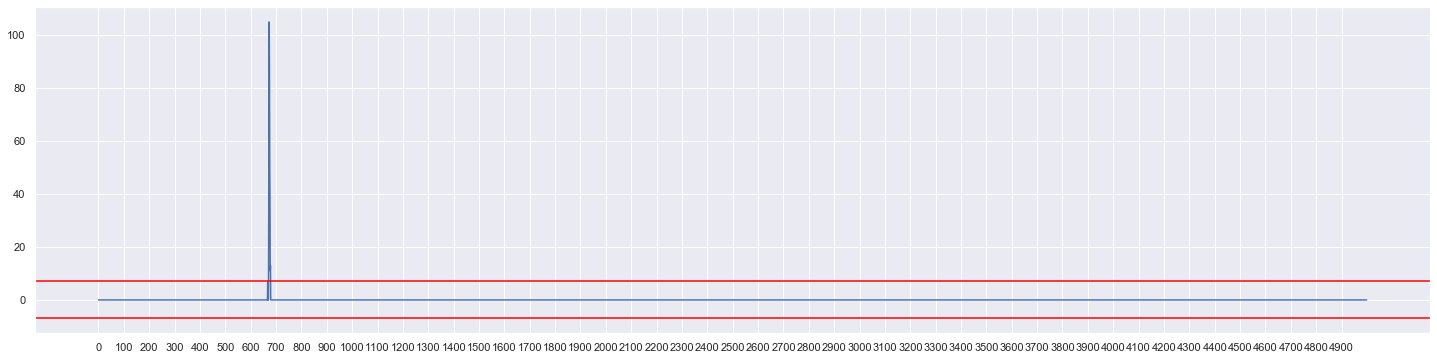

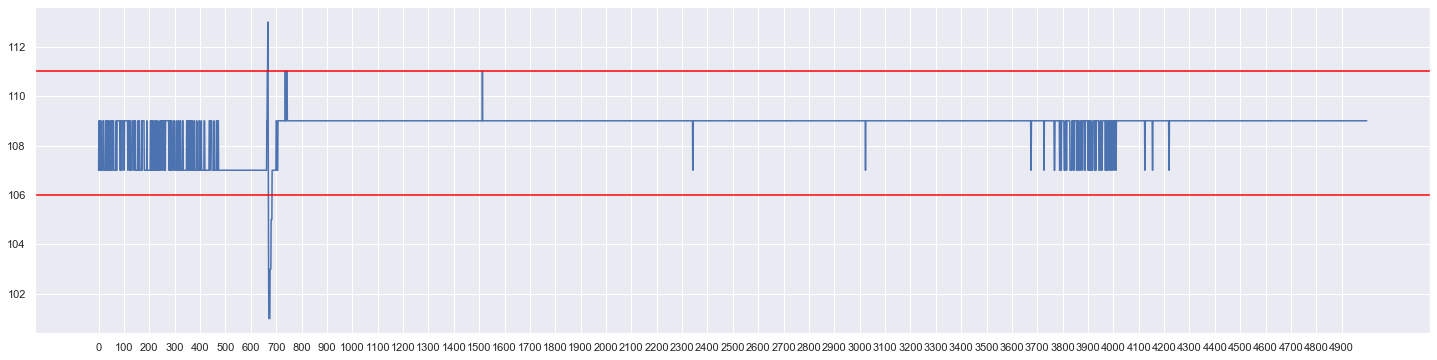

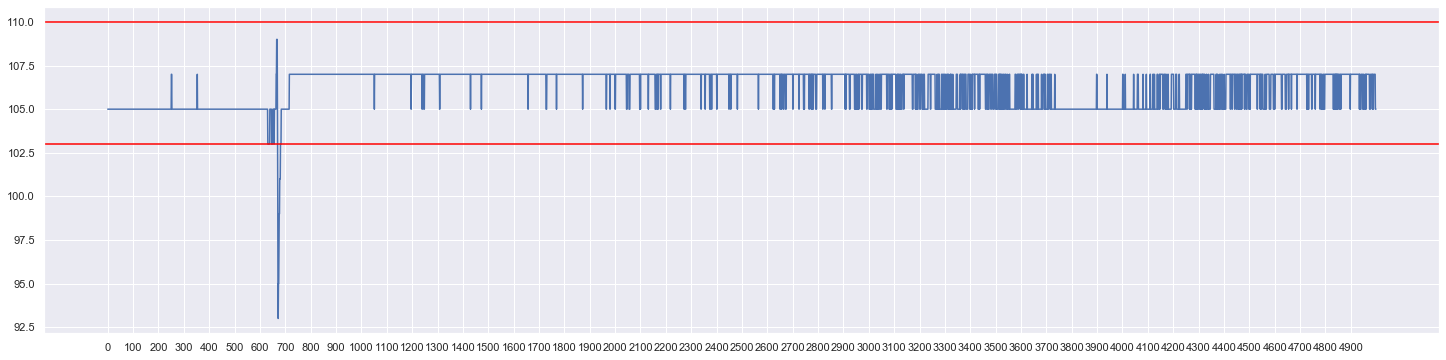

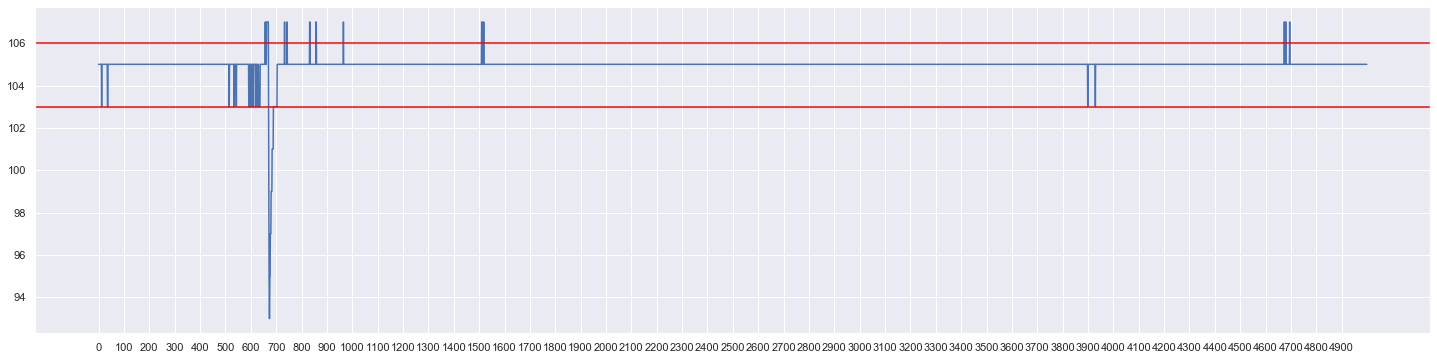

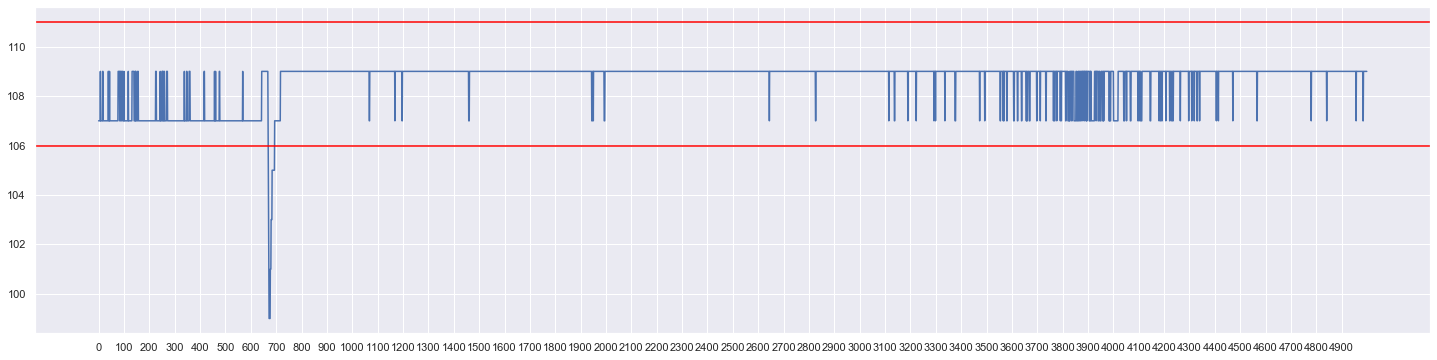

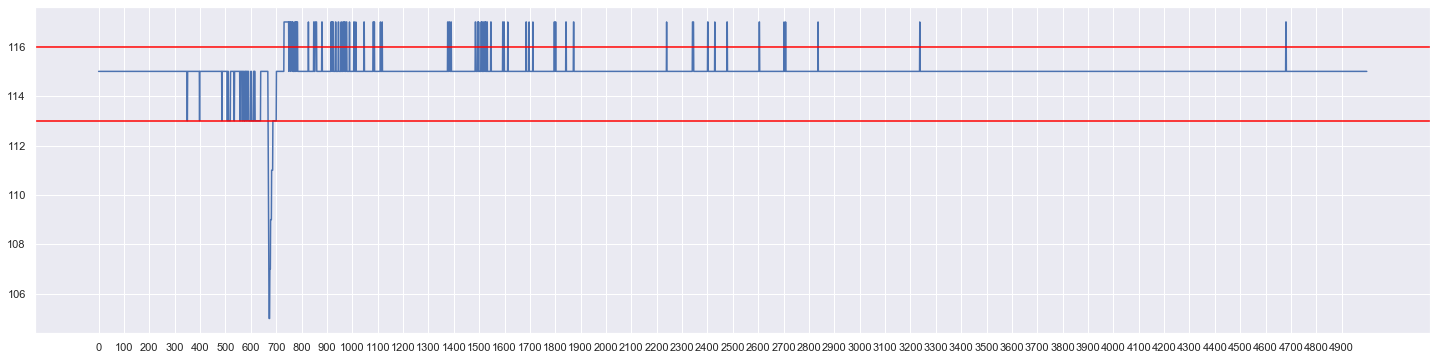

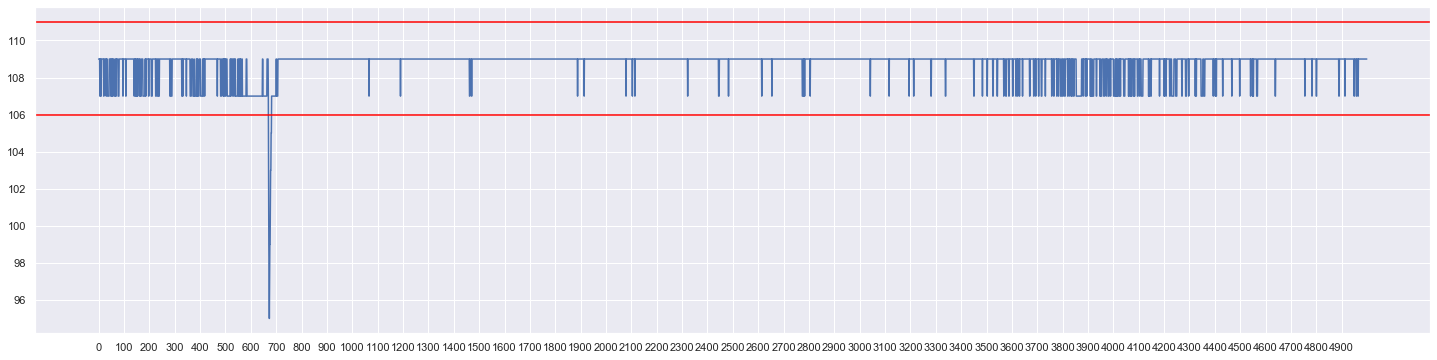

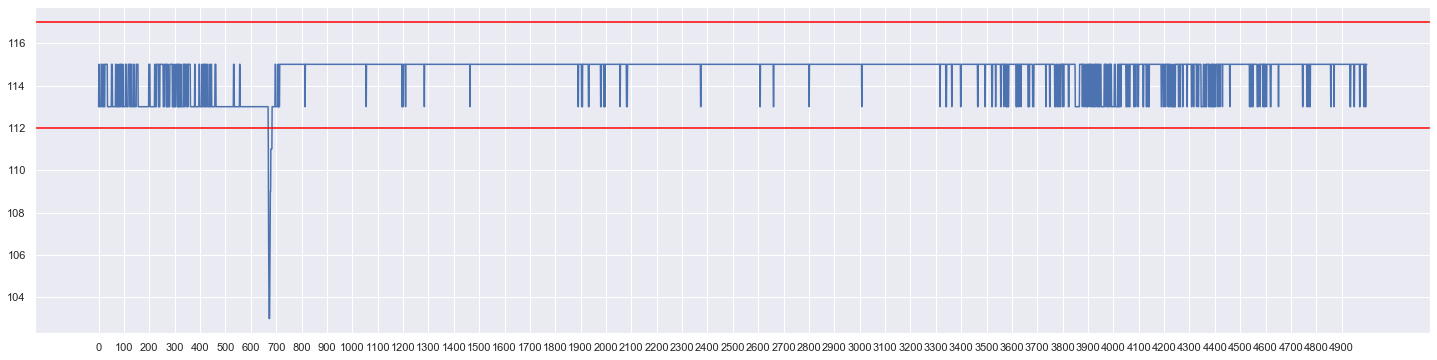

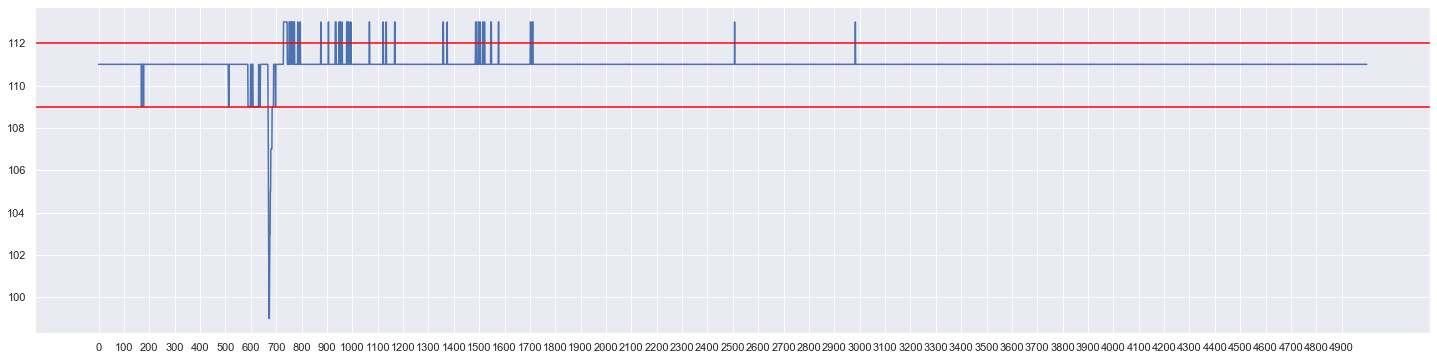

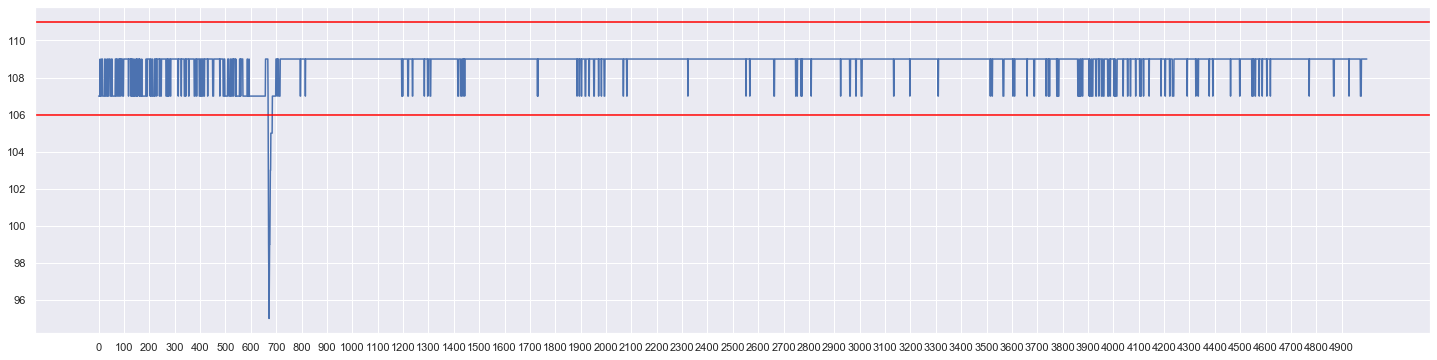

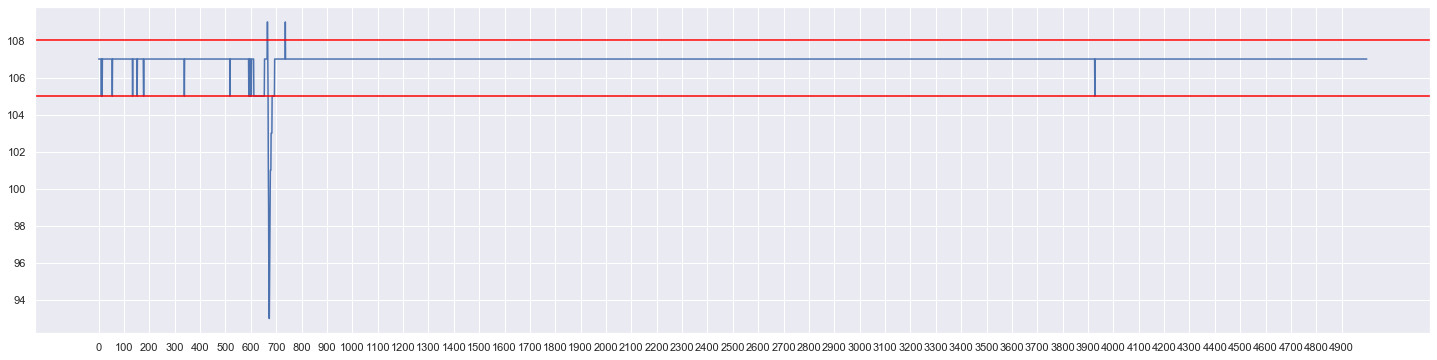

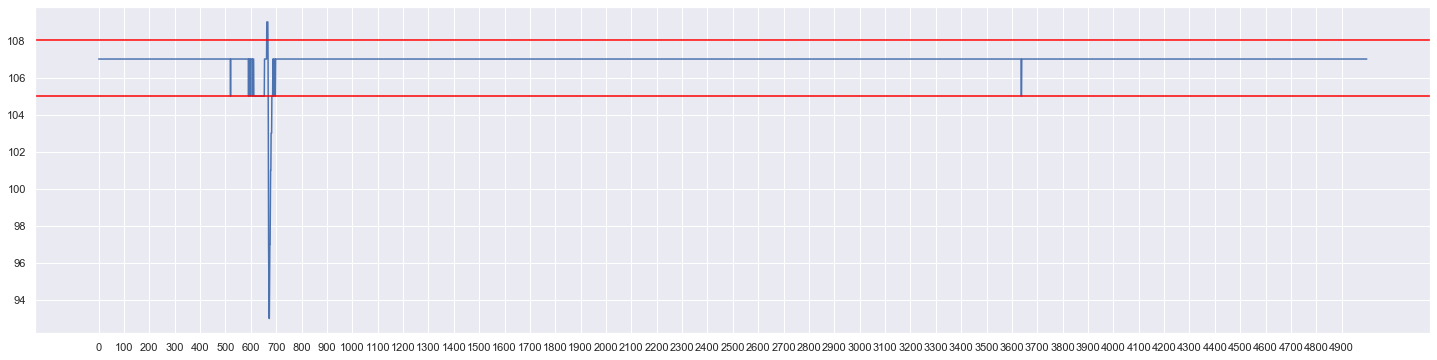

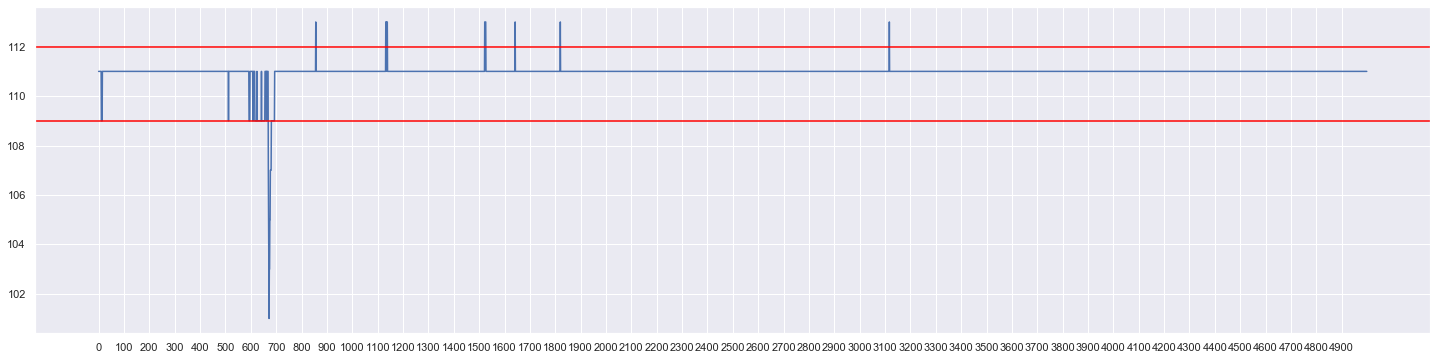

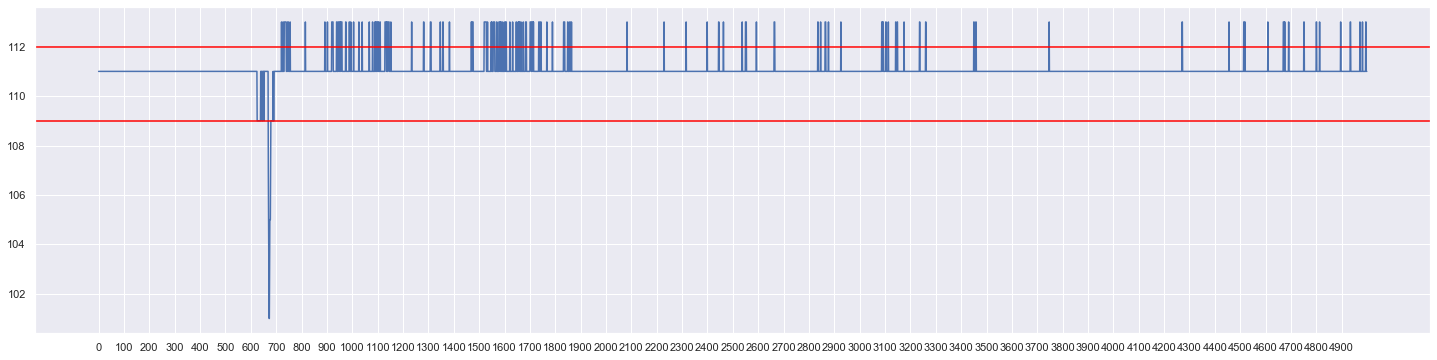

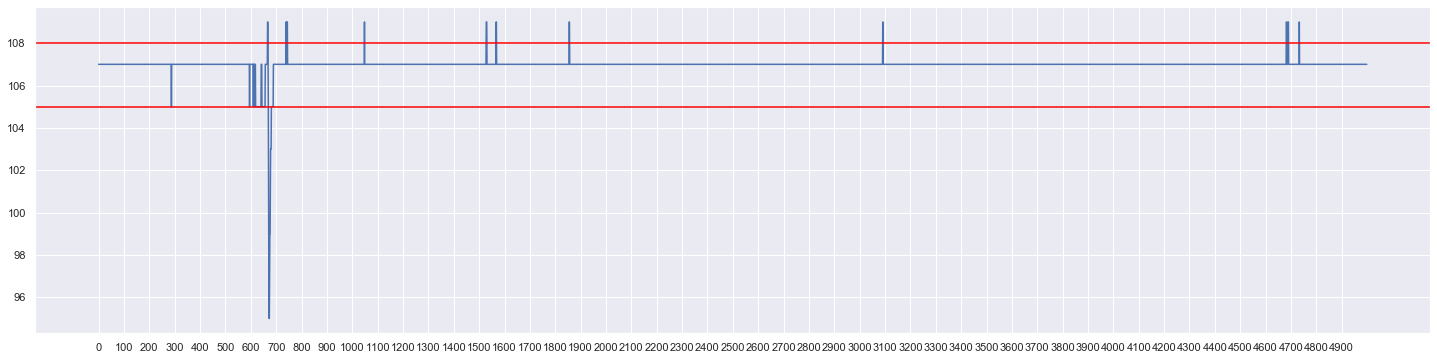

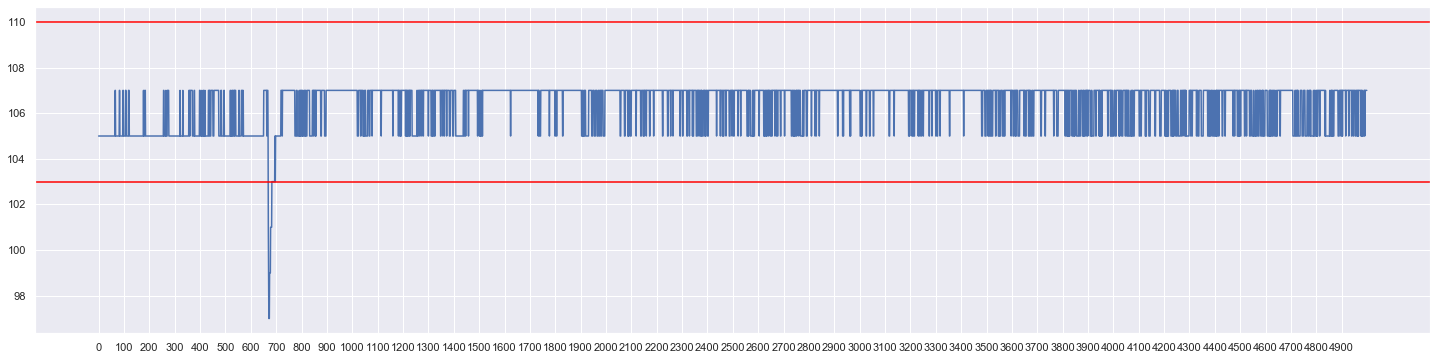

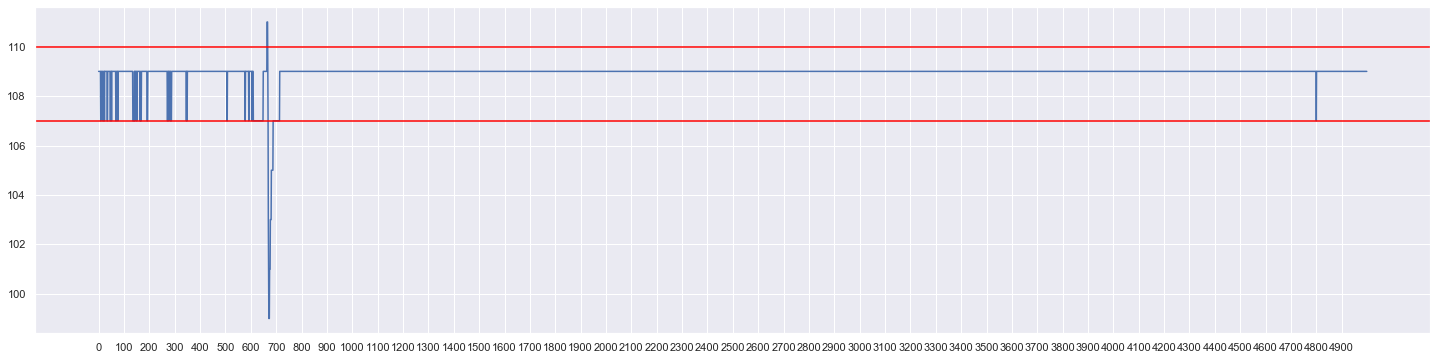

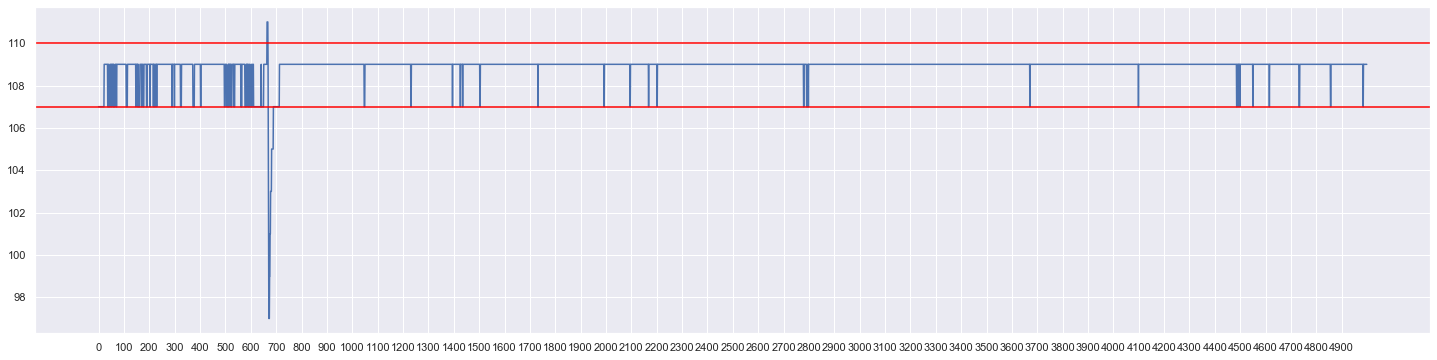

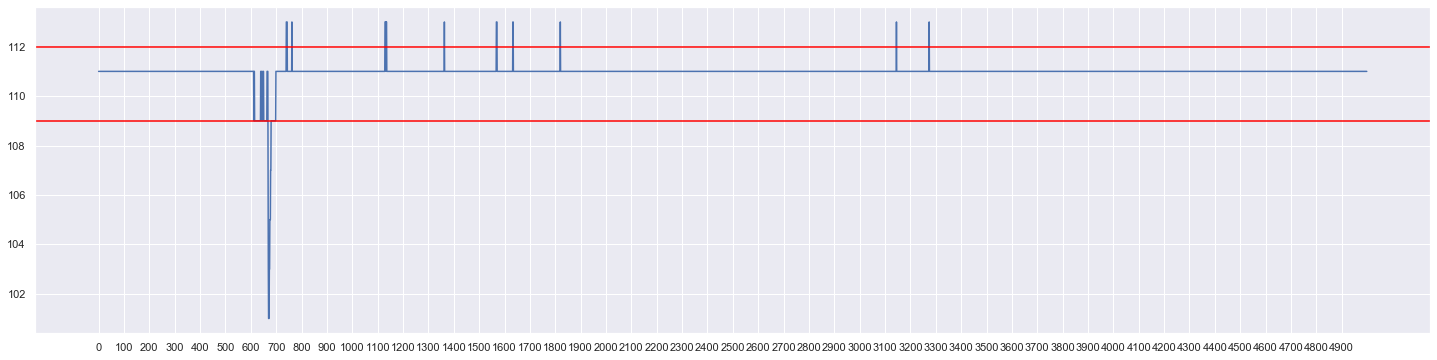

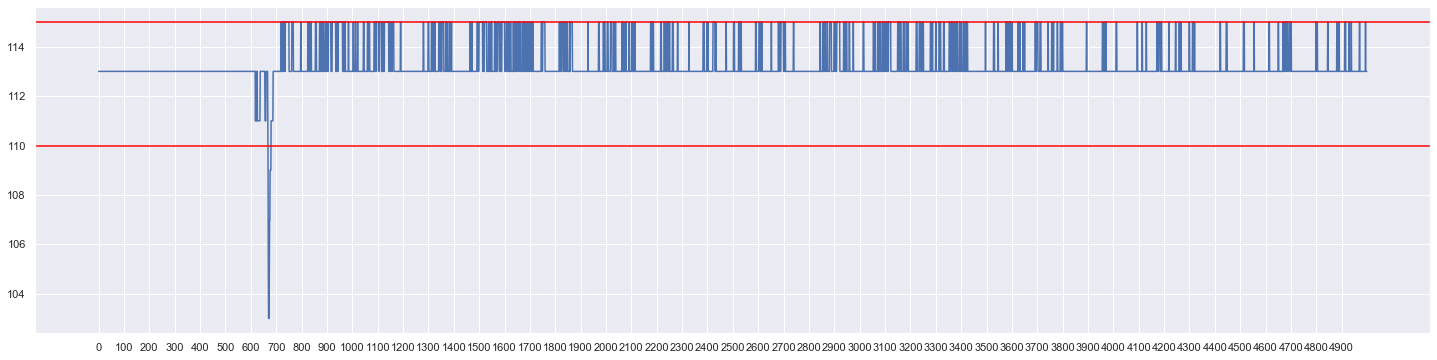

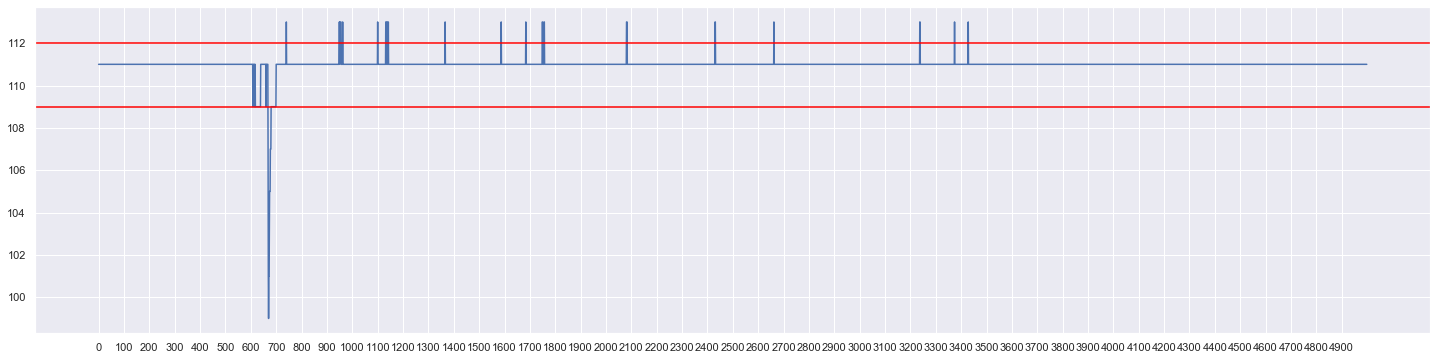

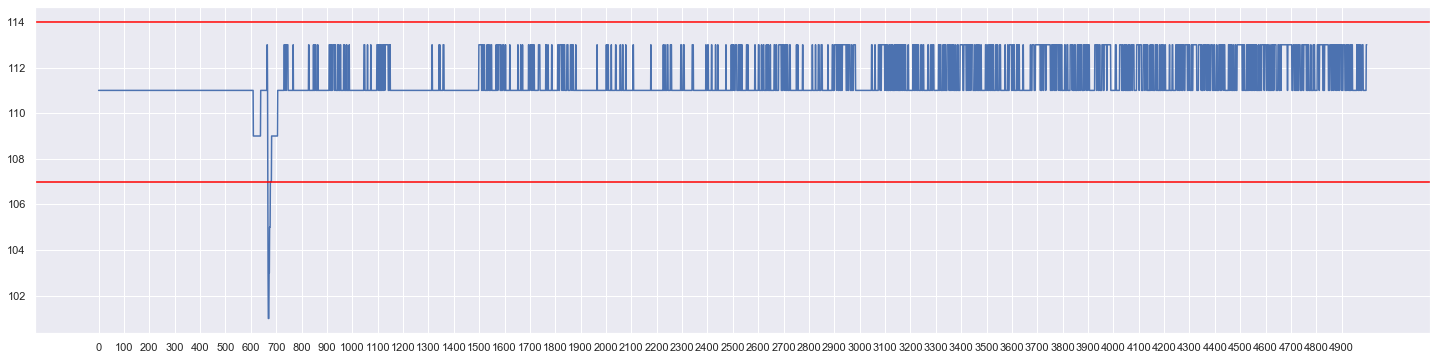

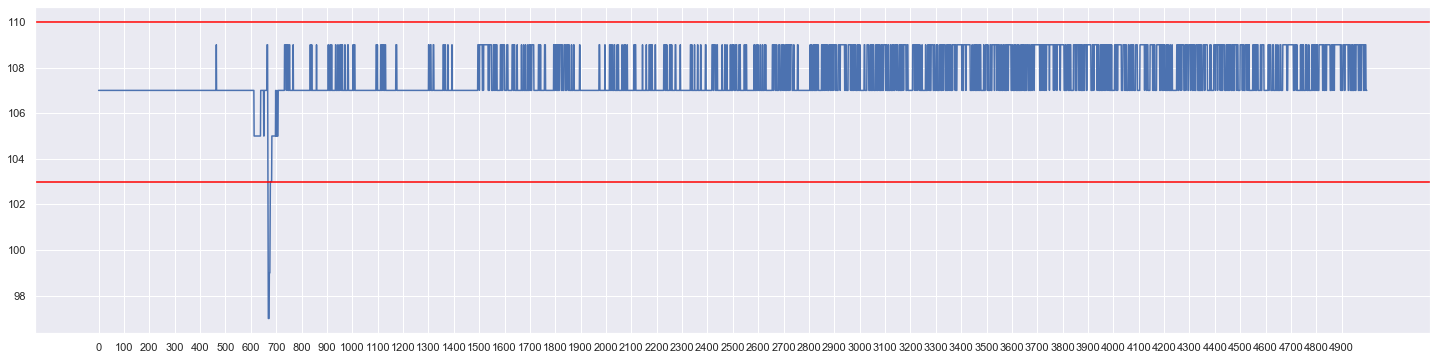

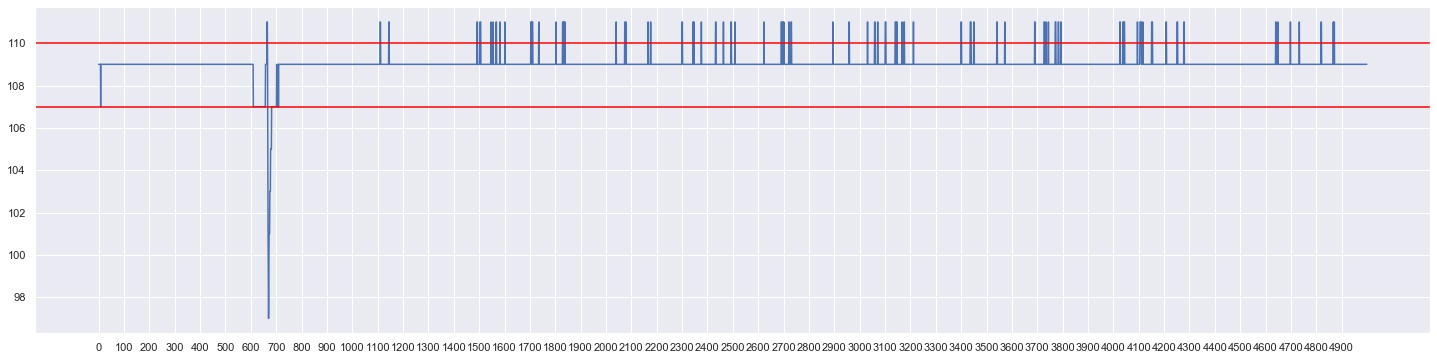

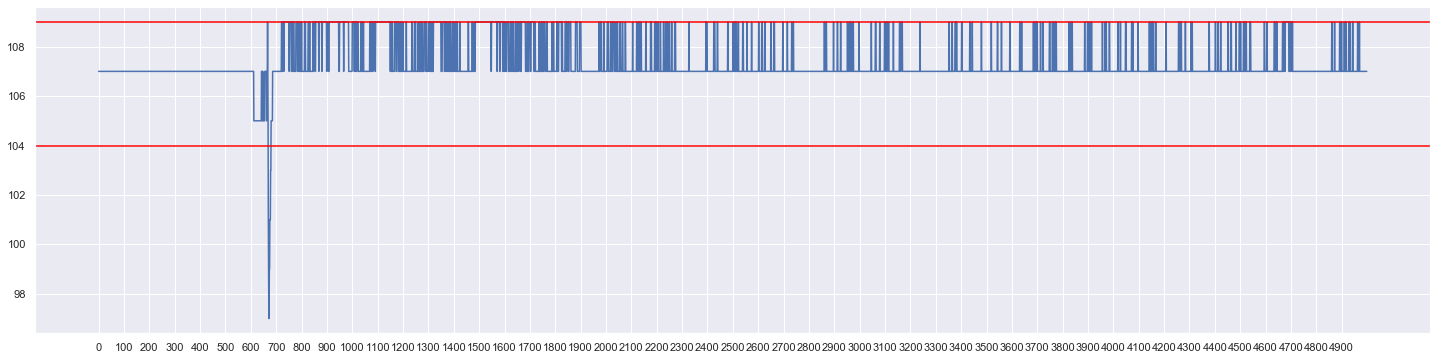

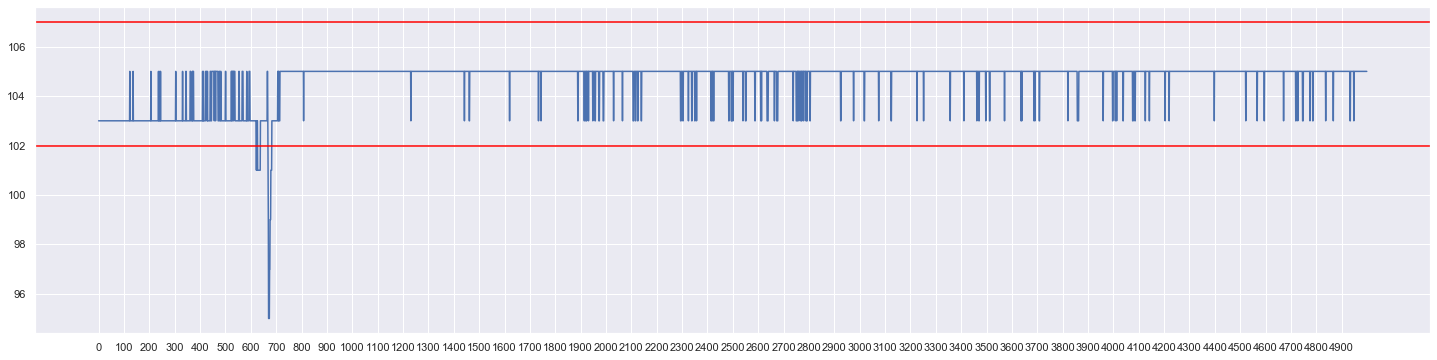

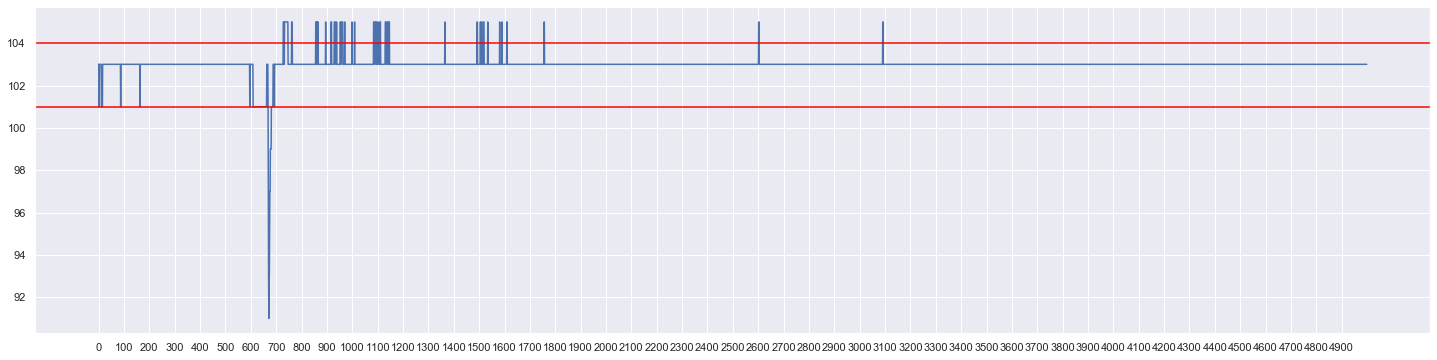

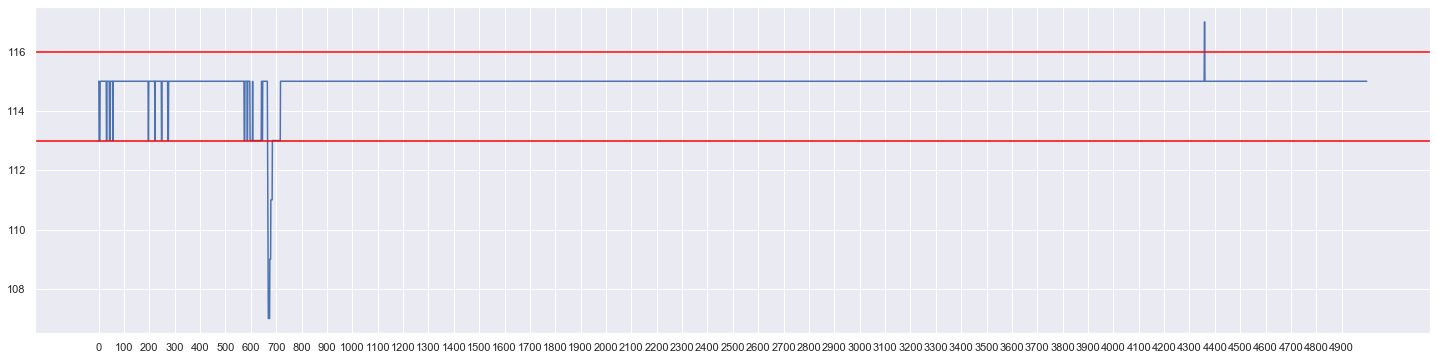

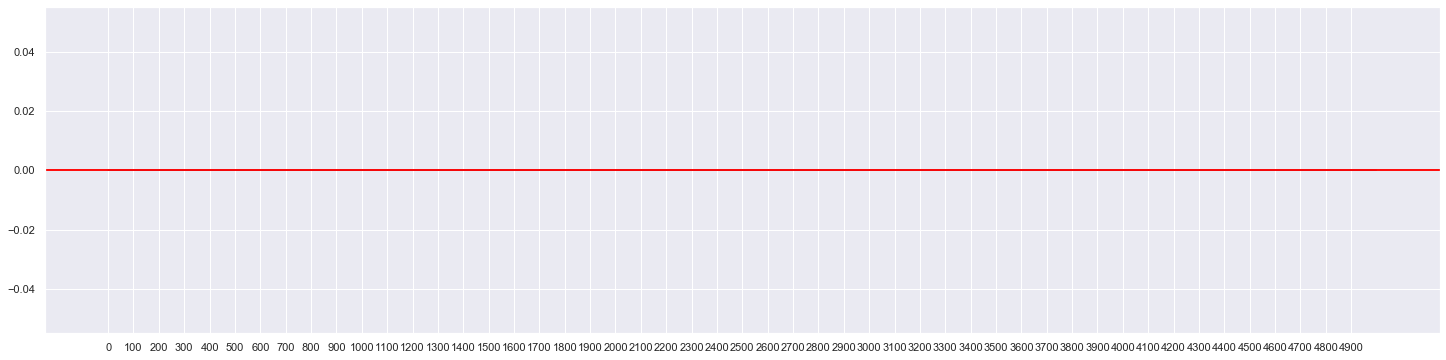

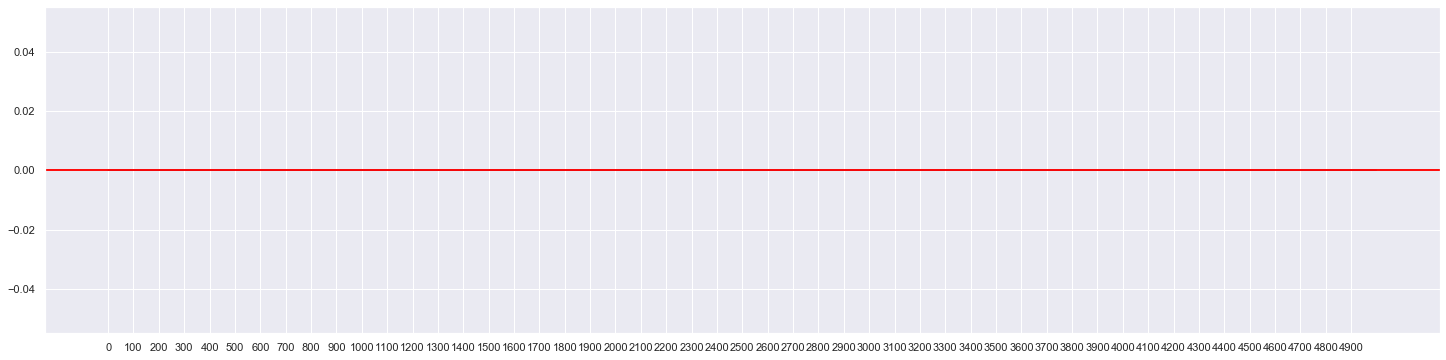

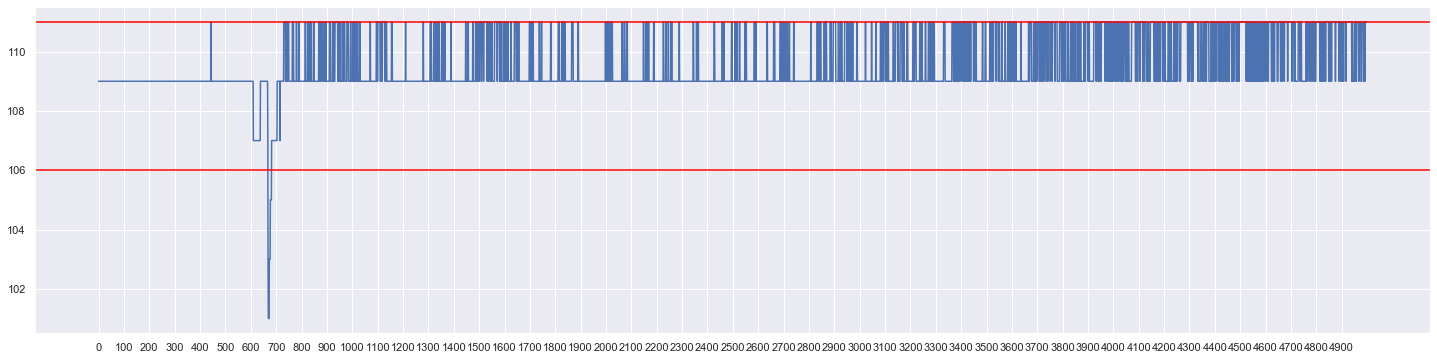

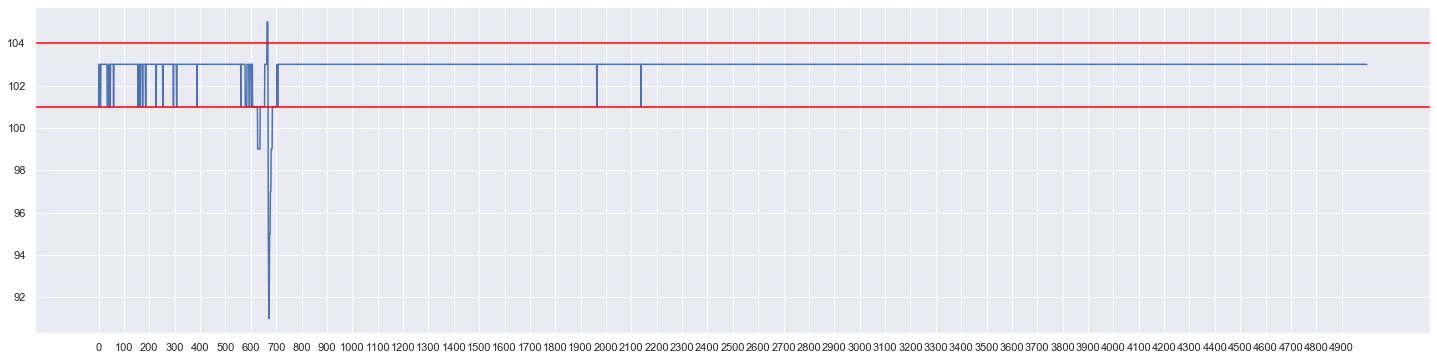

In [59]:
for i in train_df.columns.to_list():
    temp = data[:5000,i]
    u_std = int(np.median(temp) + 3*temp.std())
    l_std = int(np.median(temp) - 3*temp.std())
    plt.figure(figsize = (25,6))
    plt.plot(temp)
    plt.axhline(u_std, c='red')
    plt.axhline(l_std, c='red')
    plt.xticks(np.arange(0,5000,100))

---

## Function for Detect  Anomalies.

In [88]:
def anomaly_detect(pipe):
    '''
    Parameters :
        pipe = Data for a particular pipe for which you want to detect anomalies. 
                (type = numpy.ndarray)
    ---------------------------------------------------------------------------------------
    
    Docstring: 
        This function returns the median index of continuous anomalies in the given data.
    '''
    total = []
    for sen in range(84): # sen = sensor number.
        u_std = int(np.median(pipe[:,sen]) + 3*pipe[:,sen].std()) # +3 standard deviation of given pipe's particular sensor's data. 
        l_std = int(np.median(pipe[:,sen]) - 3*pipe[:,sen].std()) # -3 standard deviation of given pipe's particular sensor's data.
        l1 = [index for index,value in enumerate(pipe[:,sen]) if value > u_std] # Indexes of data which is greater than u_std
        l2 = [index for index,value in enumerate(pipe[:,sen]) if value < l_std] # Indexes of data which is smaller than l_std
        
        # Merging l1 and l2 in a single list. By doing this for all sensors we will get all the anomalies.
        total = total+l1 
        total = total+l2
        
    uni = list(set(total)) # list 'total' can contain duplicate indexes. So we're removing duplicate indexes.
    uni.sort() # Sorting for getting median index of continuous anomalies.
    
    #----------------------------------------------------------
    # Getting median index of continuous anomalies.
    # ---------------------------------------------------------
    ind = 0
    out = []
    for i in range(len(uni)-1):
        if uni[i]+1 == uni[i+1]:
            continue
        else:
            temp = np.array(uni[ind:i+1])
            med = int(np.median(temp))
            out.append(med)
            ind = i+1
    out = list(set(out)) # Removing duplicate median indexes from list.
    out.sort()
    return out
# Getting anomalies for pipe no: 2
print(anomaly_detect(data[5000:10000]))

[11, 65, 101, 136, 171, 181, 189, 198, 211, 213, 216, 220, 666, 729, 754, 774, 791, 819, 854, 936, 940, 1029, 1070, 1095, 1132, 1241, 1263, 1336, 1436, 1445, 1478, 1481, 1510, 1570, 1633, 1645, 1690, 1702, 1711, 1741, 1905, 1907, 1946, 1949, 1980, 1998, 2035, 2096, 2100, 2105, 2115, 2123, 2147, 2153, 2171, 2173, 2180, 2199, 2256, 2287, 2294, 2303, 2308, 2311, 2316, 2341, 2349, 2411, 2474, 2503, 2518, 2533, 2546, 2636, 2759, 2777, 2946, 2951, 2992, 3017, 3066, 3127, 3199, 3224, 3230, 3247, 3282, 3321, 3359, 3379, 3392, 3487, 3549, 3582, 3589, 3636, 3656, 3701, 3742, 3781, 3822, 3899, 3907, 3969, 4031, 4053, 4072, 4086, 4094, 4104, 4109, 4216, 4236, 4241, 4250, 4643, 4687, 4750, 4812]


---

## Getting  Anomalies  For  All  Pipes.

#### Creating Dictionary for pipe names and their data

In [92]:
pipe_dict = {}
start = 0
end = 5000
for i in range(10):
    name = 'pipe_' + str(i+1)
    pipe_dict[name] = pipe_dict.get(name,data[start:end])
    start = end
    end+=5000
pipe_dict.keys(),pipe_dict.values()

(dict_keys(['pipe_1', 'pipe_2', 'pipe_3', 'pipe_4', 'pipe_5', 'pipe_6', 'pipe_7', 'pipe_8', 'pipe_9', 'pipe_10']),
 dict_values([array([[127, 105, 103, ...,   0, 109, 101],
        [127, 105, 103, ...,   0, 109, 103],
        [127, 105, 103, ...,   0, 109, 103],
        ...,
        [127, 105, 103, ...,   0, 111, 103],
        [127, 105, 103, ...,   0, 111, 103],
        [127, 105, 103, ...,   0, 111, 103]], dtype=uint8), array([[127, 105, 103, ...,   0, 109, 103],
        [127, 105, 103, ...,   0, 111, 103],
        [127, 105, 103, ...,   0, 109, 103],
        ...,
        [127, 105, 103, ...,   0, 109, 103],
        [127, 105, 103, ...,   0, 109, 103],
        [127, 105, 103, ...,   0, 109, 103]], dtype=uint8), array([[127, 105, 103, ...,   0, 109, 103],
        [127, 105, 103, ...,   0, 109, 103],
        [127, 105, 103, ...,   0, 109, 103],
        ...,
        [125, 103,  99, ...,   0, 107,  99],
        [125, 103, 101, ...,   0, 107,  99],
        [127, 103, 101, ...,   0, 107,  

## Getting All The Anomalies In All Pipes In Single Dictionary.

        i.e. dictionary = {pipe_no : list_of_anomalies}

In [90]:
anomalies = {}
for key,value in pipe_dict.items():
    anomalies[key] = anomalies.get(key,anomaly_detect(value))
anomalies

{'pipe_1': [33,
  94,
  157,
  218,
  623,
  711,
  772,
  779,
  783,
  794,
  815,
  823,
  827,
  833,
  848,
  857,
  864,
  872,
  876,
  880,
  887,
  889,
  892,
  894,
  902,
  906,
  910,
  920,
  934,
  944,
  957,
  970,
  976,
  981,
  986,
  989,
  996,
  1006,
  1014,
  1021,
  1026,
  1039,
  1046,
  1067,
  1080,
  1083,
  1087,
  1091,
  1098,
  1103,
  1110,
  1120,
  1136,
  1151,
  1167,
  1190,
  1234,
  1281,
  1309,
  1347,
  1358,
  1363,
  1365,
  1374,
  1376,
  1382,
  1390,
  1447,
  1456,
  1469,
  1474,
  1486,
  1493,
  1497,
  1504,
  1510,
  1514,
  1525,
  1543,
  1547,
  1550,
  1552,
  1558,
  1568,
  1580,
  1586,
  1590,
  1593,
  1601,
  1607,
  1611,
  1617,
  1621,
  1630,
  1633,
  1639,
  1642,
  1647,
  1654,
  1656,
  1659,
  1665,
  1668,
  1674,
  1678,
  1684,
  1690,
  1700,
  1711,
  1717,
  1736,
  1743,
  1749,
  1756,
  1767,
  1773,
  1789,
  1796,
  1802,
  1820,
  1829,
  1835,
  1843,
  1849,
  1857,
  1864,
  1872,
  1997,
  204

# Creating DataFrame for individual pipe

In [75]:
pipe_1 = train_df[:5000].copy()
pipe_2 = train_df[5000:10000].copy()
pipe_3 = train_df[10000:15000].copy()
pipe_4 = train_df[15000:20000].copy()
pipe_5 = train_df[20000:25000].copy()
pipe_6 = train_df[25000:30000].copy()
pipe_7 = train_df[30000:35000].copy()
pipe_8 = train_df[35000:40000].copy()
pipe_9 = train_df[40000:45000].copy()
pipe_10 = train_df[45000:50000].copy()

### Re-Indexing Dataframes 

In [76]:
pipe_list = [pipe_2,pipe_3,pipe_4,pipe_5,pipe_6,pipe_7,pipe_8,pipe_9,pipe_10]

In [77]:
for pipe in pipe_list:
    pipe.reset_index(drop=True,inplace=True)

# Creating Dataframe of anomalies for each pipe.

In [93]:
pipe_1_anomalies = pipe_1.iloc[anomalies['pipe_1']]
pipe_2_anomalies = pipe_2.iloc[anomalies['pipe_2']]
pipe_3_anomalies = pipe_3.iloc[anomalies['pipe_3']]
pipe_4_anomalies = pipe_4.iloc[anomalies['pipe_4']]
pipe_5_anomalies = pipe_5.iloc[anomalies['pipe_5']]
pipe_6_anomalies = pipe_6.iloc[anomalies['pipe_6']]
pipe_7_anomalies = pipe_7.iloc[anomalies['pipe_7']]
pipe_8_anomalies = pipe_8.iloc[anomalies['pipe_8']]
pipe_9_anomalies = pipe_9.iloc[anomalies['pipe_9']]
pipe_10_anomalies = pipe_10.iloc[anomalies['pipe_10']]

In [94]:
pipe_list = [pipe_1_anomalies,
pipe_2_anomalies,
pipe_3_anomalies,
pipe_4_anomalies,
pipe_5_anomalies,
pipe_6_anomalies,
pipe_7_anomalies,
pipe_8_anomalies,
pipe_9_anomalies,
pipe_10_anomalies]

In [97]:
pipe_list_names = ['pipe_1_anomalies',
'pipe_2_anomalies',
'pipe_3_anomalies',
'pipe_4_anomalies',
'pipe_5_anomalies',
'pipe_6_anomalies',
'pipe_7_anomalies',
'pipe_8_anomalies',
'pipe_9_anomalies',
'pipe_10_anomalies']

In [101]:
for pipe,pipe_name in zip(pipe_list,pipe_list_names):
    pipe.to_csv('D:\\Data Science Course\\Projects\\Anomaly Detection\\'+pipe_name)